<a href="https://colab.research.google.com/github/AmberLee2427/minicourses/blob/main/chapter5/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style>
body, h1, h2, h3, h4, h5, h6, p, div, span {
    font-family: "Helvetica Neue", Helvetica, Arial, sans-serif !important;
}
</style>

# <font face="Helvetica" size="7">Chapter 5: Mini Data Challenge</font>  

<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

<i> Authors: Amber Malpas, Katarzyna Kruszyńska, Somayeh Khakpash, Ali Crisp </i>

<br>

If you would like an introduction to python notebooks, please read this tutorial: https://medium.com/codingthesmartway-com-blog/getting-started-with-jupyter-notebook-for-python-4e7082bd5d46

Please note, you must **save this notebook in a space owned by you** (a GitHub repo, gist, to Google Drive, or locally) if you want to come back to it later without losing your progress. You can edit and run this notebook on Colab, but it **will not auto save** for you.

If you choose to use lcoal resources your notebook will use your local packages, so you should follow install a virtual environment with the following packages. Run the cell below to create a downloadable `.yml` file, to automate the package install process (provided you are using anaconda).

In [1]:
yaml = '''name: roman_fit
channels:
  - conda-forge
dependencies:
  - python=3.11
  - numpy
  - matplotlib
  - pandas
  - scipy
  - jupyter
  - ipython
  - astropy
  - beautifulsoup4
  - lxml              # required parser for bs4
  - pip
  - pip:
      - pathos
      - MulensModel'''

# save the yaml
with open('environment.yml', 'w') as f:
    f.write(yaml)

Click the folder button on the side bar to open the file explorer. The file `environment.yml` should be in there now. Just click the triple dots on the side and then `Download` to download the `.yml` file.

```bash
conda env create -f environment.yml
```

Running the above line in a terminal (Anaconda Prompt on Windows) will create a virtual conda environment called `minicourse`, which has the required packages installed.

You can activate the environment with:

```bash
conda activate minicourse
```

From here you have two options

1. You can open the notebook running
```bash
jupyter notebook
```
from a parent folder to your locally saved version of this notebook and navigating to the notebook in your browser. You may need to select `minicourse` as your kernel before running the notebook.

2. Alternatly, you can create a local "Runtime" and for your Colab notebook by following [these instructions](https://www.google.com/url?q=https%3A%2F%2Fresearch.google.com%2Fcolaboratory%2Flocal-runtimes.html).
```bash
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --no-browser
```

  ⚠️ We don't generally recommend that you do this with notebooks that you didn't write as it give them access to your local machine

<!--
## <font face="Helvetica" size="6"> Dev Notes </font>
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">
-->



<!-- ### <font face="Helvetica" size="5"> Overview </font>

The current plan is to give the students a miniature "season" of data to fit (as in a couple hundred lightcurves), and an example of how to fit a whole season in a notebook. This example will be using pyLiMA for the model fitting. If we are using Mulens Model we will probably just have to pretend that the observatory is on Earth.

The data will be the same set that the C4 data come from.

The notebook should probably include a pyLiMASS example.

### <font face="Helvetica" size="5"> Links to Content </font>

https://lsu.app.box.com/s/qx440yp9ekzrhaevtfu7ksnfgh2jhc29

https://drive.google.com/drive/folders/1jNKztBVCQHZTs5iPVJDFTy1btLGn15s3?usp=drive_link

We need a single lens set. I might have to generate it. Or ask Ali to.

### <font face="Helvetica" size="5"> Ideas </font>

* Mass measurement?
* Astrometric microlensing?
* False positives in the data?
* Demographics?

### <font face="Helvetica" size="5"> Note </font>

> I'm staring by just doing a bunch of coding examples. I'll remove pieces and turn them in to exercises after.
-->

<!--
> ### Rough Plan
>
>**Chapter 5: Mini Data Challenge – Bulk Microlensing Analysis**
>
> 1. **Introduction**  
>    - Briefly explain the motivation for bulk data analysis in the Roman era: processing hundreds or thousands of events without manually tweaking each one.  
>    - Emphasize that while Chapter 4 focused on hands-on analysis for individual events, Chapter 5 is about scaling up—addressing the pitfalls and nuances encountered when working with large datasets.
>
> 2. **Single Event Fit**
>    - Recap of Chapter 4
>    -  **Special Topics** (Optional Sections):
>      - **Astrometry:**  
>        Outline how astrometric microlensing can provide additional constraints, noting that this is an extra module for those interested.  
>      - **Mass Estimates:**  
>        Provide a brief discussion (and possibly code snippets) on deriving mass estimates from parallax and finite source effects, with the understanding that full implementation is an advanced topic.
>
> 3. **Small subset**
>    - Set up the framework for fitting the entire season as an exercise.   
>    - Test in out on a small subset of the data
>    - **Parallelization for Computational Efficiency**  
>      - Describe the challenges of running heavy computations in a Jupyter Notebook, especially the "frozen function" issue when parallelizing.  
>      - Demonstrate a small-scale example of in-notebook parallelization on the same small subset
>      - Explain that kernel restarts may be necessary when modifying functions.
>
>    - **Future Directions and Advanced Topics**  
>      - Briefly outline how an automated anomaly detection method (e.g., using a windowed reduced chi-squared metric) could help flag problematic events for further analysis.  
>      - Provide links or references (e.g., RTModel documentation) for students who want to delve deeper into automation.
>
> 4. **Full Season**
>    - Fit a mini season's worth of microlensing events
>    - **Initial Fitting and Residual Inspection**
>      - **Parameter Degeneracies, Priors and Bounds:**  (This should be mostly covered in Chapter 4)
>
>        Discuss the degeneracies (e.g., u_0, t_E vs. F_B) and how to set sensible priors (e.g. log rho) or bounds(e.g. u_0>0).
>      - **Inintial Parameter Estimates**
>        Run a mini-season-wide basic fit (using a basic PSPL fit) on all events. This model is covered in Chapter 4, we are just smashing through it to get our parameter estimates for a higher order fit.
>      - Explain how deviations in the residuals can indicate the need for a more complex (binary) model.  
>    - **False Positives**
>      - **Manual Inspection:**  
>        Show a subset of around 10 lightcurves for detailed manual inspection.
>      - Somayeh: include a discussion on false positives and how to recognize them and, ideally, include them in the dataset.
>    - **Higher Order Effects**
>      - turn on the higher order effects needed for mass estimates and let it go.
>
>    - **Mass**
>      Leave this as a homework exercise
>
> 5. **Advanced Fitting Techniques for Complex Events**  (Move this to Chpater 4 and leave it as information, not an exercise)
>    - **Robust Sampling Methods:**  
>      Introduce why gradient descent methods fail for binary events, and present **emcee** (or another MCMC sampler) as a better alternative for exploring spastic likelihood spaces.  
>    - **Priors**  
>    - **Binary-Lens Degeneracies:**  
     Mention that a broad grid search is often employed to explore the parameter space thoroughly, though we won’t implement this in full here.

-->


## <font face="Helvetica" size="6"> 1. Introduction </font>

<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

Welcome to **Chapter 5: Mini Data Challenge - Bulk Microlensing Analysis**.

In this chapter, we shift from the carefully guided world of single-event modeling into the messier, faster, and far more chaotic domain of bulk lightcurve analysis. You'll go from fitting one event at a time to building the infrastructure that lets you handle dozens—eventually thousands—automatically.

### <font face="Helvetica" size="5"> Why Are We Doing This? </font>

With the upcoming Roman Space Telescope, the volume of microlensing events is expected to abruptly increase with. Simulations suggest the number of microlensing events observed by Roman, in its lifetime, will be on the order of tens of thousands. Event analysis is expected to become primarily an automated, buck-processing endaevor. Manually tuning each fit just isn't practical. Instead, we need a streamlined approach that lets us quickly process bulk data while still catching those subtle details. That kind of thinking is what we are going to emulate in this chapter.


### <font face="Helvetica" size="5"> What's in It for You? </font>

Our aim is to provide you with a realistic view of what working with bulk microlensing data involves. This chapter is designed to help you build confidence in managing large datasets while also preparing you for the more complex tasks you'll encounter in your future research.

You'll simulate the process of fitting a full observing season: downloading data, defining objective functions, writing event finders, applying priors, parallelizing computation, and adapting to subtle data challenges in real time.

This isn't just about models—it's about workflow. It's about thinking like a pipeline without losing your scientific instincts.

### <font face="Helvetica" size="5"> What Will You Learn? </font>
* How to fit single-lens microlensing events **at scale**
* How to structure your code for **repeatability and automation**
* How to apply **priors** that penalize unphysical results (like negative flux)
* Understand the limitations of simpler fitting methods and see how advanced tools like **emcee** can help you explore complex likelihood spaces.
* How to integrate tools like **MulensModel** with your own logic
* How to use **pathos** for notebook-friendly parallelization
* How to spot when your tools are starting to break—and why that's a feature, not a flaw

You'll also get:
* Hands-on experience with real OGLE EWS data
* The chance to write your own event-finding algorithm
* An optional full-season Roman simulation challenge to pull it all together

<!--
### <font face="Helvetica" size="5"> Dev Notes </font>
-->

<!--
>  [x] Where are we going to get the data from? WG7?
>>> Old data challenge data
>
>  [x] Where are we hosting this?
>>> Static notebooks in the same place as the slides and links to colab.
>
>  [x] yaml/ install instruction, if we aren't on Colab
>>> W are staying in Colab. Install inline.
>
>  [x] css integration, if we aren't on Colab
>>> It works for the static notebook so this could still be worth while.
-->



## <font face="Helvetica" size="6"> 2. Racap of the Single-Lens Fit </font>

<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">


In [2]:
#@title Imports and Setup

# system tools
import os
import sys
from io import StringIO
import time
from typing import Tuple, Callable, Optional, List
import shutil

# data analysis tools
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
from IPython.display import display
from scipy.optimize import minimize
import astropy.units as u
from astropy.coordinates import Angle, SkyCoord
from google.colab import sheets

# web scrapping tools
import bs4 as bs
import urllib
import urllib.request
import pandas as pd

# parallel processing tools
!pip install pathos
from pathos.multiprocessing import ProcessingPool as Pool  # for multiprocessing inside jupyter
import multiprocessing as mp  # Ensure this is imported

# microlensing tool
!pip install MulensModel
import MulensModel

### <font face="Helvetica" size="5"> 2.1 Mulens Model Package Fix </font>

Follow the instructions in this section **if you haven't already got a working version of Mulens Model**.

You can check whether your version is working by generating the plot in [Section 2.2](#section-22).

In [3]:
#@title Removing the 'data' file inside `mulensmodel_dir`

mulensmodel_dir = os.path.dirname(MulensModel.__file__)
data_file_path = os.path.join(mulensmodel_dir, 'data')

if os.path.exists(data_file_path):
  if os.path.isfile(data_file_path):
    os.remove(data_file_path)
  else:
    shutil.rmtree(data_file_path)
  print(f"Removed 'data' file or directory from {mulensmodel_dir}")
else:
  print(f"No 'data' file or directory found in {mulensmodel_dir}")

Removed 'data' file or directory from /usr/local/lib/python3.11/dist-packages/MulensModel


In [4]:
#@title Replace this path with the path printed above, if they are different
!ls /usr/local/lib/python3.11/dist-packages/MulensModel

AdaptiveContouring.cpython-311-x86_64-linux-gnu.so
b0b1utils.py
binarylensimports.py
binarylens.py
binarylenswithshear.py
causticsbinary.py
causticsbinarywithshear.py
causticspointwithshear.py
coordinates.py
elliputils.py
event.py
fitdata.py
horizons.py
__init__.py
limbdarkeningcoeffs.py
magnificationcurve.py
modelparameters.py
model.py
mulensdata.py
mulensobjects
orbits
pointlens.py
pointlenswithshear.py
__pycache__
satelliteskycoord.py
tests
trajectory.py
uniformcausticsampling.py
utils.py
VBBL.cpython-311-x86_64-linux-gnu.so
version.py


In [5]:
#@title Clone the MulensModel directory from git
!git clone https://github.com/rpoleski/MulensModel.git


fatal: destination path 'MulensModel' already exists and is not an empty directory.


In [6]:
#@title Copy the data folder to the package location

print('Cuurent Working Directory:')
!ls

print('\nMulensModel Directory:')
!ls MulensModel

# copy the data folder to the package location
# you may need to change these file paths, depending on where you run this notebook
!cp -r ./MulensModel/data /usr/local/lib/python3.11/dist-packages/MulensModel

print('\nMulensModel Package Directory:')
!ls /usr/local/lib/python3.11/dist-packages/MulensModel

print('\ndata Directory:')
!ls /usr/local/lib/python3.11/dist-packages/MulensModel/data

Cuurent Working Directory:
2025-BLG-0001.png  2025-BLG-0010.png  2025-BLG-0019.png  2025-BLG-0028.png
2025-BLG-0002.png  2025-BLG-0011.png  2025-BLG-0020.png  2025-BLG-0029.png
2025-BLG-0003.png  2025-BLG-0012.png  2025-BLG-0021.png  2025-BLG-0030.png
2025-BLG-0004.png  2025-BLG-0013.png  2025-BLG-0022.png  environment.yml
2025-BLG-0005.png  2025-BLG-0014.png  2025-BLG-0023.png  MulensModel
2025-BLG-0006.png  2025-BLG-0015.png  2025-BLG-0024.png  sample_data
2025-BLG-0007.png  2025-BLG-0016.png  2025-BLG-0025.png
2025-BLG-0008.png  2025-BLG-0017.png  2025-BLG-0026.png
2025-BLG-0009.png  2025-BLG-0018.png  2025-BLG-0027.png

MulensModel Directory:
AUTHORS.md	 developers_board.md  LICENSE	      requirements.txt
CITATION.cff	 docs		      MANIFEST.in     setup.py
CONTRIBUTING.md  documents	      pyproject.toml  source
data		 examples	      README.md

MulensModel Package Directory:
AdaptiveContouring.cpython-311-x86_64-linux-gnu.so
b0b1utils.py
binarylensimports.py
binarylens.py
binarylensw

In [7]:
import warnings

# Suppress *just that specific warning* because we know what its doing and
# we want to keep the output clean
warnings.filterwarnings("ignore", message=".*does not have a limb-darkening coefficient.*")


### <font face="Helvetica" size="5"> 2.2 Single-Lens Fitting with Mulens Model <a id="section-22"></a> </font>


In [8]:
#@title Available finite source methods

finite_source_methods = [
    # Uniform source
    'finite_source_uniform_Gould94',               # 0, 10E-3 < rho < 1 (has a bug)
    'finite_source_uniform_Gould94_direct',        # 1, 10E-3 < rho < 1
    'finite_source_uniform_WittMao94',             # 2, rho < 0.01
    'finite_source_uniform_Lee09',                 # 3, rho > 0.01

    # Limb-darkened source
    'finite_source_LD_WittMao94',                  # 4, rho < 0.01
    'finite_source_LD_Yoo04',                      # 5, 10E-3 < rho < 1
    'finite_source_LD_Yoo04_direct',               # 6, 10E-3 < rho < 1
    'finite_source_LD_Lee09'                       # 7, rho > 0.01
]

Let's take a look at how different higher-order effects change the magnification model.  

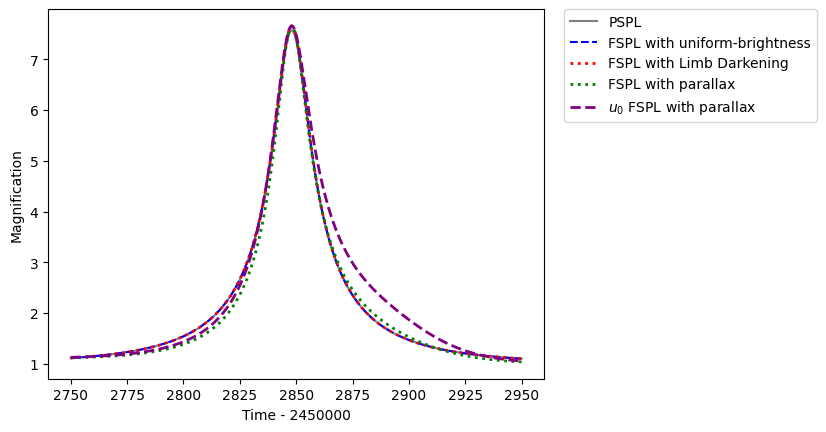

In [9]:
#@title Plotting the magnification models

# plot bounds
t_min = 2452750
t_max = 2452950
t_range = [t_min, t_max]

# Model parameters
t_0 =  2452848.06
u_0 = 0.133
t_E = 61.5
log_rho = -1.4 #@param {type:"slider", min:-3, max:0, step:0.1}
rho = 10**log_rho
pi_E_E = -1.4 #@param {"type":"slider","min":-5,"max":5,"step":0.1}
pi_E_N = 1.7 #@param {type:"slider", min:-5, max:5, step:0.1}
t_0_par = 2452848.06 # should not change during modelling and needs to be close to t_0

# Define a point source, point lens model
pspl = MulensModel.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E})

# Define a finite source, point lens model
fspl = MulensModel.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E, 'rho': rho})

# Define a parallax model
fspl_pllx = MulensModel.Model({'t_0': t_0,
                          'u_0': u_0,
                          't_E': t_E,
                          'rho': rho,
                          'pi_E_E': pi_E_E,
                          'pi_E_N': pi_E_N,
                          't_0_par': t_0_par
                          },
                         ra='18:04:45.71',
                         dec='-26:59:15.2'
                         )

# Plot the magnification curve:
plt.close(0)
plt.figure(0)
pspl.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='grey',
    linestyle='-',
    label='PSPL'
    )

# calculate the magnification curve using a finite source model
fspl.set_magnification_methods([2450000., finite_source_methods[1], 2470000.])  # rho = 0.1
fspl.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='blue',
    linestyle='--',
    label='FSPL with uniform-brightness'
    )

# calculate the magnification curve using a finite source model with limb darkening
fspl.set_magnification_methods([2450000., finite_source_methods[5], 2470000.])  # rho = 0.1
fspl.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='red',
    linestyle=':',
    linewidth=2,
    label='FSPL with Limb Darkening'
    )

# calculate the magnification curve using a finite source model and parallax
fspl_pllx.set_magnification_methods([2450000., finite_source_methods[1], 2470000.])  # rho = 0.1
fspl_pllx.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='green',
    linestyle=':',
    linewidth=2,
    label='FSPL with parallax'
    )


# calculate the u_0 finite-source, parallax solution
fspl_pllx.set_magnification_methods([2450000., finite_source_methods[3], 2470000.])
parameters = ["t_0", "u_0", "t_E", "rho", "pi_E_E", "pi_E_N", "t_0_par"]
setattr(fspl_pllx.parameters, "u_0", -u_0)  # multiply u0 by -1
fspl_pllx.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='purple',
    linestyle='--',
    linewidth=2,
    label=r'$u_0$ FSPL with parallax'
    )

plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.show()

If your version of Mulens model is working, this figure should have rendered without an error.

> There are a few things to take away from this plot:
> * the finite source effect has a big affect on the shape of the magnification curve
> * the surface brightness model (e.g., uniform) for the source has much less of an affect
> * the degenerate parallax solutions may be noticably different with sufficiently large parallax
> * parallax does not need to be as big, for the affect to noticably change the magnification curve, compared with a static model.

> **Exercise X**
>
> Try playing with the parallax (`"pi_E_N"`, `"pi_E_E"`) and finite source (`"rho"`)parameters and see how they  change your magnification model.

> *Note. This is not an interactive plot. You have to run the cell again after moving the slider.*

## <font face="Helvetica" size="6"> 3. OGLE EWS Bulk Lightcurve Fit </font>
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

The Roman style data have many epoch which make the evaluation of a magnification model take a long time. Ground -based data, on the other hand have much fewer epochs and alert pages, such as OGLEs EWS, which estimate fit parameters for us. We are going to design our bulk fit on these much more tractible data and then apply it to a simulated Roman season later.



### <font face="Helvetica" size="5"> 3.1 Getting the ground-based data <a id="section-22"></a> </font>

Let's start this process by scraping for some lightcurves and microlensing model parameter estimates.

In [10]:
#@title Web scrapping functions

def get_data_url(event: str) -> str:
    '''Takes an event name and returns the URL for the data page.'''

    event = event.split('-') # split the event name into its components, seperated by '-'
    year = event[0]  # the first component is the year
    region = event[1].lower()  # the second component is region (e.g., blg or gd), which we need to make lower case.
    number = event[2]  #
    url = f'https://www.astrouw.edu.pl/ogle/ogle4/ews/{year}/{region}-{number}/phot.dat'

    return url

def fetch_event_data(url: str) -> pd.DataFrame:
    '''Takes a url and returns the data as a pandas dataframe.'''

    # Read the data from the URL
    response = urllib.request.urlopen(url)
    data = response.read().decode('utf-8')

    # Convert the data to a pandas DataFrame
    #df = pd.read_csv(StringIO(data), delim_whitespace=True, header=None, names=['HJD', 'I magnitude', 'magnitude error', 'seeing', 'sky level'])
    df = pd.read_csv(StringIO(data), sep=r'\s+', header=None, names=['HJD', 'I magnitude', 'magnitude error', 'seeing', 'sky level'])

    return df

# Test
event = '2017-BLG-0001'
event_data_url = get_data_url(event)
data = fetch_event_data(event_data_url)
print(data)

               HJD  I magnitude  magnitude error  seeing  sky level
0     2.457060e+06       17.644            0.034    7.59     1155.0
1     2.457061e+06       17.665            0.027    6.44      945.0
2     2.457061e+06       17.652            0.025    4.90     1305.0
3     2.457062e+06       17.682            0.024    5.85      934.0
4     2.457062e+06       17.702            0.023    5.10     1085.0
...            ...          ...              ...     ...        ...
2657  2.458047e+06       17.666            0.031    7.25      996.0
2658  2.458049e+06       17.661            0.018    4.33      703.0
2659  2.458049e+06       17.682            0.017    4.14      844.0
2660  2.458054e+06       17.672            0.035    6.18     1496.0
2661  2.458054e+06       17.686            0.041    7.01     1568.0

[2662 rows x 5 columns]


Great. Now that we have functions to fetch lightcurves from the OGLE EWS website, we can just grab those when we need them. But we also need some good parameter estimates if we don't want our fits to take eternity to run, or potentially fail to find the likelihood maximum. Estimating these parameters is part of the EWS process, so we can shamlessly steal from those for this exercise.

In [11]:
#@title More web scraping (this time for the EWS table)

def fetch_table_data(url):
    '''Takes a URL and returns the first table as a pandas DataFrame.'''
    source = urllib.request.urlopen(url).read()
    soup = bs.BeautifulSoup(source, 'lxml')
    table = soup.find_all('table')
    df = pd.read_html(StringIO(str(table)))[0]

    return df

ews_url = "https://ogle.astrouw.edu.pl/ogle4/ews/ews.html"  # https://ogle.astrouw.edu.pl/ogle4/ews/2024/ews.html for last year
ews_df = fetch_table_data(ews_url)
print(ews_df)

     Unnamed: 0          Event      Field  Star No   RA (J2000)  Dec (J2000)  \
0           NaN  2025-BLG-0001  BLG497.22    26223  17:19:44.68  -27:43:21.4   
1           NaN  2025-BLG-0002  BLG498.16    23293  17:17:24.61  -29:19:44.8   
2           NaN  2025-BLG-0003  BLG498.24   149001  17:18:03.34  -28:50:21.4   
3           NaN  2025-BLG-0004  BLG498.29     2940  17:20:03.15  -28:41:15.5   
4           NaN  2025-BLG-0005  BLG499.29    47835  17:19:54.58  -29:57:28.0   
..          ...            ...        ...      ...          ...          ...   
644         NaN  2025-BLG-0632  BLG917.11    66187  17:17:02.64  -32:22:39.1   
645         NaN  2025-BLG-0633  BLG917.31    31098  17:14:22.17  -31:46:26.5   
646         NaN  2025-BLG-0634  BLG932.08    46852  17:34:52.34  -40:24:12.2   
647         NaN  2025-BLG-0635  BLG994.21    38810  17:06:37.07  -37:35:59.2   
648         NaN   2025-DG-0010  DG1025.03    13653  18:54:24.23   -0:53:18.3   

      Tmax (HJD)      Tmax (UT)      ta

Let's just loop through all the events and add the data URLs to the pandas dataframe, for convenience.

In [12]:
#@title Adding a URL column to the data frame

# Add a new column to the EWS data frame ('ews_df'), using the column name 'event data url'.
ews_df['event data url'] = ews_df['Event'].apply(get_data_url)
print(ews_df)
print(min(ews_df['Tmax (HJD)']), max(ews_df['Tmax (HJD)']))
print(min(ews_df['Umin']), max(ews_df['Umin']))
print(min(ews_df['tau']), max(ews_df['tau']))

     Unnamed: 0          Event      Field  Star No   RA (J2000)  Dec (J2000)  \
0           NaN  2025-BLG-0001  BLG497.22    26223  17:19:44.68  -27:43:21.4   
1           NaN  2025-BLG-0002  BLG498.16    23293  17:17:24.61  -29:19:44.8   
2           NaN  2025-BLG-0003  BLG498.24   149001  17:18:03.34  -28:50:21.4   
3           NaN  2025-BLG-0004  BLG498.29     2940  17:20:03.15  -28:41:15.5   
4           NaN  2025-BLG-0005  BLG499.29    47835  17:19:54.58  -29:57:28.0   
..          ...            ...        ...      ...          ...          ...   
644         NaN  2025-BLG-0632  BLG917.11    66187  17:17:02.64  -32:22:39.1   
645         NaN  2025-BLG-0633  BLG917.31    31098  17:14:22.17  -31:46:26.5   
646         NaN  2025-BLG-0634  BLG932.08    46852  17:34:52.34  -40:24:12.2   
647         NaN  2025-BLG-0635  BLG994.21    38810  17:06:37.07  -37:35:59.2   
648         NaN   2025-DG-0010  DG1025.03    13653  18:54:24.23   -0:53:18.3   

      Tmax (HJD)      Tmax (UT)      ta

Nice! Now we have some data to test on. And some web scraping skills under our belts too. We should quickly test this with a single lightcurve, and plot the model from the OGLE EWS table.

> **Exercise X**
>
> Complete the plot below.

2025-BLG-0001
Index(['Unnamed: 0', 'Event', 'Field', 'Star No', 'RA (J2000)', 'Dec (J2000)',
       'Tmax (HJD)', 'Tmax (UT)', 'tau', 'Umin', 'Amax', 'Dmag', 'fbl', 'Ibl',
       'I0', 'event data url'],
      dtype='object')


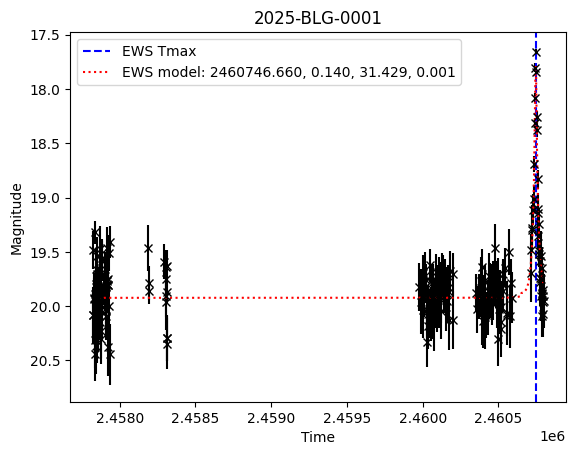

In [13]:
#@title Plotting the '2025-BLG-0001' event with the EWS model


# [ ] add parallax to the model.
# [ ] edit to include the other ews parameters


# Function to process a single event
def plot_event_data(i, ews_df):
    event = ews_df['Event'][i]
    print(event)
    print(ews_df.columns)
    url = ews_df['event data url'][i]
    data = fetch_event_data(url)
    t_0_0 = ews_df['Tmax (HJD)'][i]
    u_0_0 = ews_df['Umin'][i] * 1.1  # initial guess
    t_E_0 = ews_df['tau'][i] * 1.1  # initial guess
    rho_0 = 0.001  # initial guess


    plt.close(i+1)
    plt.figure(i+1)

    plt.errorbar(data['HJD'],
                  data['I magnitude'],
                  yerr=data['magnitude error'],
                  fmt='x',
                  color='black'
                  )
    plt.axvline(ews_df['Tmax (HJD)'][i], color='blue', linestyle='--', label='EWS Tmax')

    plt.title(event)
    plt.xlabel('HJD')
    plt.ylabel('I magnitude')

    # Data as a list of numpy arrays
    data_list = [data['HJD'].to_numpy(), data['I magnitude'].to_numpy(), data['magnitude error'].to_numpy()]

    # Pack everything into MulensModel objects
    data_object = MulensModel.MulensData(data_list=data_list,
                                plot_properties={'color': 'thistle',
                                                 'label': 'OGLE',
                                                 'marker': 'x',
                                                 'markersize': 2
                                                 },
                                phot_fmt='mag',
                                bandpass='I'
                                )
    fspl_model = MulensModel.Model({'t_0': t_0_0, 'u_0': u_0_0, 't_E': t_E_0, 'rho': rho_0})
    fspl_model.set_magnification_methods([t_0_0 - 3.0 * t_E_0,
                                          'finite_source_uniform_Gould94',
                                          t_0_0 + 3.0 * t_E_0
                                          ],
                                          source=None
                                          )  # rho <= 0.1
    event_object = MulensModel.Event(datasets=data_object, model=fspl_model)

    parameters_to_fit = ["t_0", "u_0", "t_E", "rho"]

    # Plot the initial model
    event_object.plot_model(color='r',
                            linestyle=':',
                            t_range=[min(data['HJD']),
                                     max(data['HJD'])
                                    ],
                            label='EWS model: %1.3f, %1.3f, %1.3f, %1.3f' %(t_0_0, u_0_0, t_E_0, rho_0)
                            )

    plt.legend()
    plt.savefig(f'./{event}.png', bbox_inches='tight')
    plt.show()

plot_event_data(0, ews_df)


Is it working?

If so, we can move on and test our fitting algorithms.

First, we’ll need an **objective function** — a way to measure how well our model fits the data (or, more precisely, how likely the model is to have generated the data, assuming Gaussian noise).

### <font face="Helvetica" size="5"> 3.2 Fitting basic PSPL model to <a id="section-22"></a> </font>

In [14]:
def mulens_neglogP_function(theta, parameters_to_fit, event, verbose=False):
    ''' negative log prob function for MulensModel fitting '''

    # Create a dictionary from theta values for easier access
    params = dict(zip(parameters_to_fit, theta))

    # unpack params
    t_0_value = params['t_0']
    u_0_value = params['u_0']
    t_E_value = params['t_E']
    # rho is handled later

    # Prior Checks
    # Check bounds using the names from parameters_to_fit
    # Use .get(key, default) to avoid KeyError if a parameter isn't being fit
    if not ((2460600) <= t_0_value <= (2461000)):  # this needs to change if you
                                                   # use this code to fit a different
                                                   # season
        return np.inf
    if not (0.000001 <= u_0_value <= 2.5): # Use -1 default if u_0 can't be 0
        return np.inf
    if not (0.1 <= t_E_value <= 700):
        return np.inf

    # Handle rho or log_rho prior
    if 'rho' in params:
        rho_value = params['rho']
        if not (0 <= rho_value <= 0.2): # Assuming rho >= 0 is desired
            return np.inf
    elif 'log_rho' in params:
        log_rho_value = params['log_rho']
        # Check log_rho lower bound first
        if log_rho_value < -10: # Check the log value directly
             return np.inf
        rho_value = 10**log_rho_value # Convert to rho for the upper bound check
        if rho_value > 0.2: # Check rho upper bound
             return np.inf

    # Update Model Parameters
    # If all prior checks passed, NOW update the model
    setattr(event.model.parameters, 't_0', t_0_value)
    setattr(event.model.parameters, 'u_0', u_0_value)
    setattr(event.model.parameters, 't_E', t_E_value)
    setattr(event.model.parameters, 'rho', rho_value)
    # Add other parameters if needed

    # Calculate Chi2
    dataset = event.datasets[0]
    event.fit_fluxes() # This needs the model parameters to be set correctly
    ([FS], FB) = event.get_flux_for_dataset(dataset)
    penalty = 0.0
    # penalty = ((FB / 100)**2) # why 100? I told you, vibes.

    if verbose:
        print(f'FS: {FS}, FB: {FB}')

    # Flux priors (check AFTER fitting fluxes)
    if FS <= 0 or (FS + FB) <= 0:
        return np.inf # Return inf if fluxes are non-physical

    chi2 = event.get_chi2()
    if verbose:
        print('chi2 = ', chi2)
    # Return the objective function value (negative log likelihood ~ chi2/2)
    # Scipy minimize finds the minimum, so we return chi2 (or chi2/2)
    return chi2/2.0 + penalty # Technically negLogP is chi2/2 + constant


 2025-BLG-0001
-----------------
t_0_0: 2460746.660
u_0_0: 0.140
t_E_0: 31.429
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:55:24
-----------------
Time elapsed: 1.7239110469818115 seconds
-----------------
FS: 8.87570731729936, FB: -2.4016290246311183
chi2 =  46.229878794456496
-----------------
t_0: 2460746.708 (2460746.708)
u_0: 0.161 (0.161)
t_E: 25.010 (25.010)
rho: 0.00179 (-2.74626)
-----------------
Final -logP check: 23.114939397228248
-----------------
Initial chi2 (from initial guess): 59.519622505796306
Final chi2 (from event object): 46.229878794456496
Delta chi2: -13.28974371133981
Delta chi2/dof:  -0.1954374075197031
-----------------


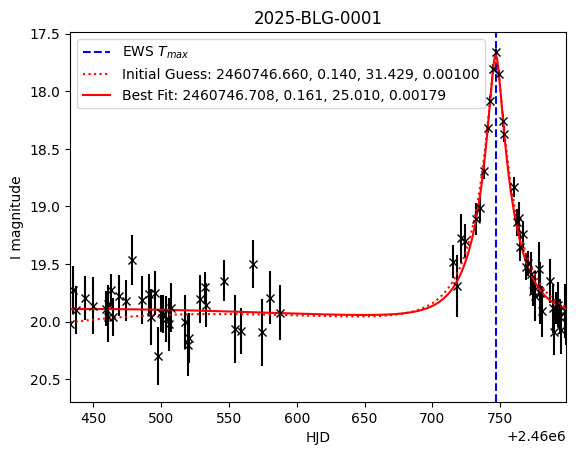


 2025-BLG-0002
-----------------
t_0_0: 2460708.786
u_0_0: 0.205
t_E_0: 97.239
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:55:26
-----------------
Time elapsed: 25.719083070755005 seconds
-----------------
FS: 6.121475358792154, FB: 10.415400723981893
chi2 =  160.6192075611816
-----------------
t_0: 2460717.537 (2460717.537)
u_0: 0.088 (0.088)
t_E: 116.846 (116.846)
rho: 0.00008 (-4.07826)
-----------------
Final -logP check: 80.3096037805908
-----------------
Initial chi2 (from initial guess): 266.4173236066316
Final chi2 (from event object): 160.6192075611816
Delta chi2: -105.79811604545
Delta chi2/dof:  -0.6080351496864943
-----------------


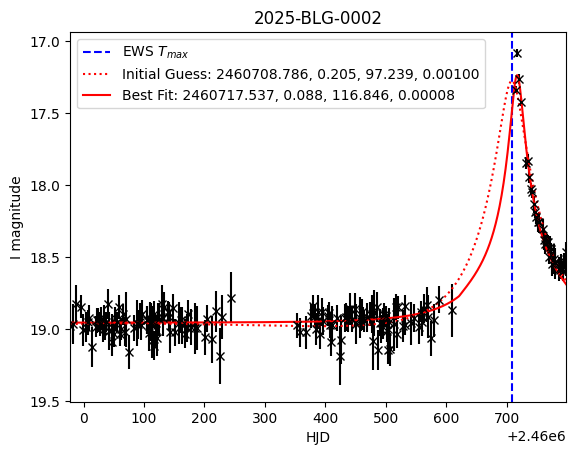


 2025-BLG-0003
-----------------
t_0_0: 2460737.016
u_0_0: 0.113
t_E_0: 21.432
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:55:53
-----------------
Time elapsed: 0.996124267578125 seconds
-----------------
FS: 4.940263321145879, FB: -0.6732878171742624
chi2 =  7.556199263672435
-----------------
t_0: 2460737.035 (2460737.035)
u_0: 0.110 (0.110)
t_E: 19.177 (19.177)
rho: 0.00086 (-3.06465)
-----------------
Final -logP check: 3.7780996318362177
-----------------
Initial chi2 (from initial guess): 11.351067477270423
Final chi2 (from event object): 7.556199263672435
Delta chi2: -3.7948682135979874
Delta chi2/dof:  -0.23717926334987421
-----------------


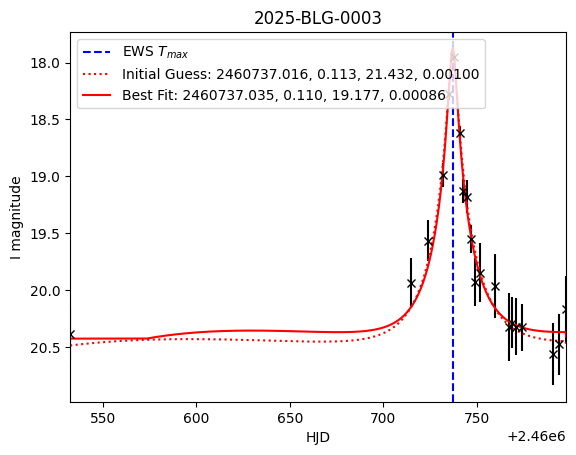


 2025-BLG-0004
-----------------
t_0_0: 2460703.874
u_0_0: 1.410
t_E_0: 71.577
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:55:54
-----------------
Time elapsed: 4.104334115982056 seconds
-----------------
FS: 31.664945236629578, FB: 160.6449861731316
chi2 =  156.8212518070667
-----------------
t_0: 2460725.391 (2460725.391)
u_0: 0.538 (0.538)
t_E: 83.782 (83.782)
rho: 0.00080 (-3.09852)
-----------------
Final -logP check: 78.41062590353334
-----------------
Initial chi2 (from initial guess): 365.2342955486718
Final chi2 (from event object): 156.8212518070667
Delta chi2: -208.41304374160512
Delta chi2/dof:  -1.218789729483071
-----------------


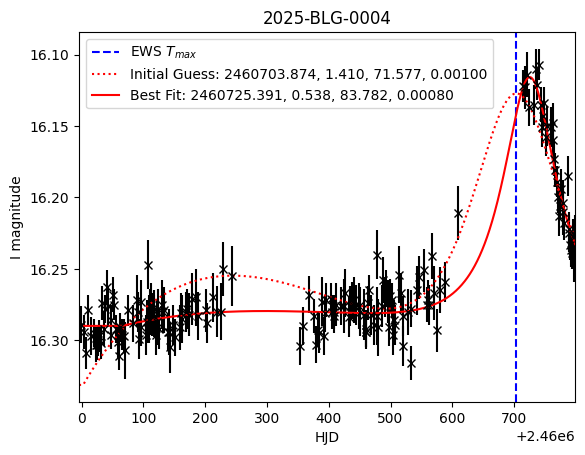


 2025-BLG-0005
-----------------
t_0_0: 2460742.481
u_0_0: 0.006
t_E_0: 39.866
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:55:58
-----------------
Time elapsed: 1.0073091983795166 seconds
-----------------
FS: 5.1638718189597, FB: -0.007826684531989357
chi2 =  31.838179953622753
-----------------
t_0: 2460742.510 (2460742.510)
u_0: 0.006 (0.006)
t_E: 39.866 (39.866)
rho: 0.00100 (-3.00001)
-----------------
Final -logP check: 15.919089976811376
-----------------
Initial chi2 (from initial guess): 50.13442036228195
Final chi2 (from event object): 31.838179953622753
Delta chi2: -18.296240408659198
Delta chi2/dof:  -0.3101057696382915
-----------------


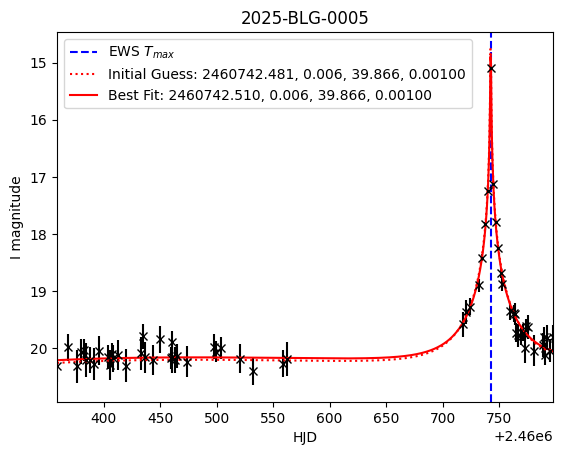


 2025-BLG-0006
-----------------
t_0_0: 2460734.833
u_0_0: 0.000
t_E_0: 12.271
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:56:01
-----------------
Time elapsed: 1.9107091426849365 seconds
-----------------
FS: 6.006408577535217, FB: 1.034869317700848
chi2 =  382.6612126880167
-----------------
t_0: 2460734.280 (2460734.280)
u_0: 0.003 (0.003)
t_E: 17.877 (17.877)
rho: 0.09443 (-1.02491)
-----------------
Final -logP check: 191.33060634400834
-----------------
Initial chi2 (from initial guess): 478.0389707081092
Final chi2 (from event object): 382.6612126880167
Delta chi2: -95.37775802009253
Delta chi2/dof:  -0.6274852501321877
-----------------


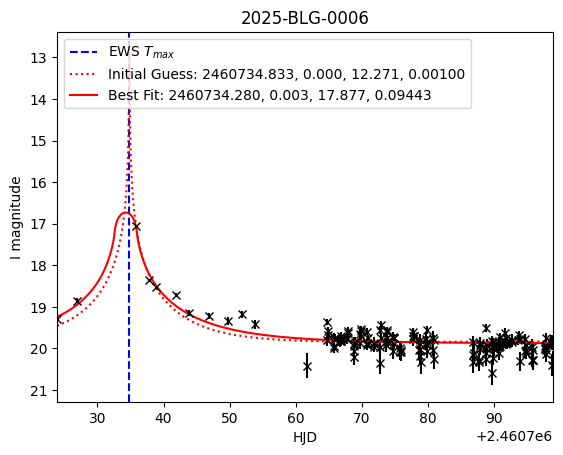


 2025-BLG-0007
-----------------
t_0_0: 2460762.856
u_0_0: 0.202
t_E_0: 152.284
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:56:03
-----------------
Time elapsed: 3.4346745014190674 seconds
-----------------
FS: 36.832295613234734, FB: 40.47590023120118
chi2 =  11015.964648418543
-----------------
t_0: 2460762.849 (2460762.849)
u_0: 0.300 (0.300)
t_E: 93.153 (93.153)
rho: 0.00199 (-2.70167)
-----------------
Final -logP check: 5507.982324209272
-----------------
Initial chi2 (from initial guess): 12988.477147961425
Final chi2 (from event object): 11015.964648418543
Delta chi2: -1972.5124995428814
Delta chi2/dof:  -1.2320502807888079
-----------------


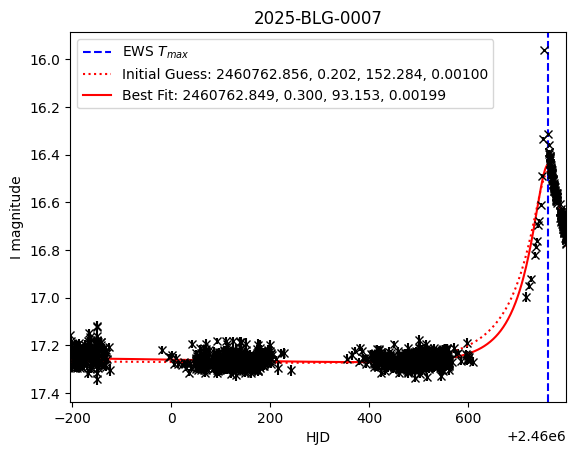


 2025-BLG-0008
-----------------
t_0_0: 2460738.278
u_0_0: 0.299
t_E_0: 21.072
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:56:07
-----------------
Time elapsed: 17.544697999954224 seconds
-----------------
FS: 7.8529284227705, FB: -0.4405574448120968
chi2 =  560.756608727246
-----------------
t_0: 2460737.815 (2460737.815)
u_0: 0.247 (0.247)
t_E: 27.338 (27.338)
rho: 0.00075 (-3.12403)
-----------------
Final -logP check: 280.378304363623
-----------------
Initial chi2 (from initial guess): 597.0466519935691
Final chi2 (from event object): 560.756608727246
Delta chi2: -36.290043266323096
Delta chi2/dof:  -0.11520648655975586
-----------------


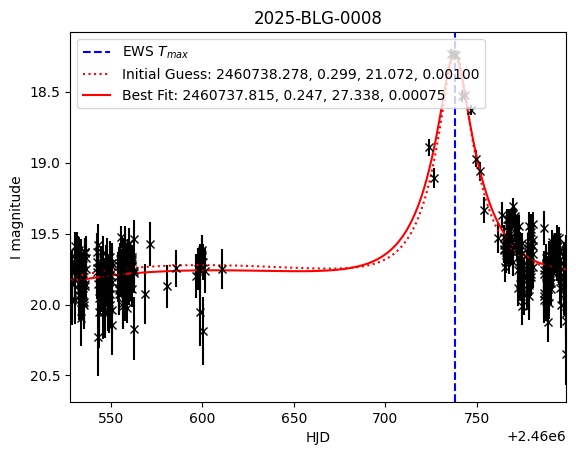


 2025-BLG-0009
-----------------
t_0_0: 2460787.087
u_0_0: 0.820
t_E_0: 54.437
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:56:25
-----------------
Time elapsed: 3.2848923206329346 seconds
-----------------
FS: 28.362840413711645, FB: 18.15664240769304
chi2 =  1340.9228696295922
-----------------
t_0: 2460787.607 (2460787.607)
u_0: 0.519 (0.519)
t_E: 71.293 (71.293)
rho: 0.00062 (-3.21082)
-----------------
Final -logP check: 670.4614348147961
-----------------
Initial chi2 (from initial guess): 1485.7549627157634
Final chi2 (from event object): 1340.9228696295922
Delta chi2: -144.8320930861712
Delta chi2/dof:  -0.18592053027749833
-----------------


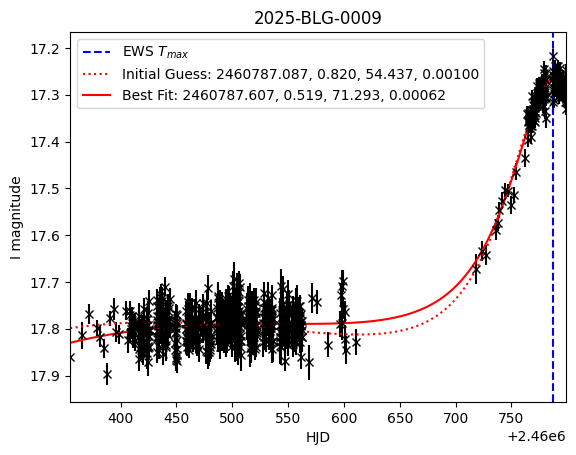


 2025-BLG-0010
-----------------
t_0_0: 2460739.656
u_0_0: 1.132
t_E_0: 10.160
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:56:28
-----------------
Time elapsed: 2.410388946533203 seconds
-----------------
FS: 43.17852769462783, FB: 36.80622344551977
chi2 =  355.1662299555353
-----------------
t_0: 2460739.456 (2460739.456)
u_0: 0.710 (0.710)
t_E: 14.274 (14.274)
rho: 0.00055 (-3.25621)
-----------------
Final -logP check: 177.58311497776765
-----------------
Initial chi2 (from initial guess): 571.8387607351775
Final chi2 (from event object): 355.1662299555353
Delta chi2: -216.67253077964222
Delta chi2/dof:  -1.2670908232727616
-----------------


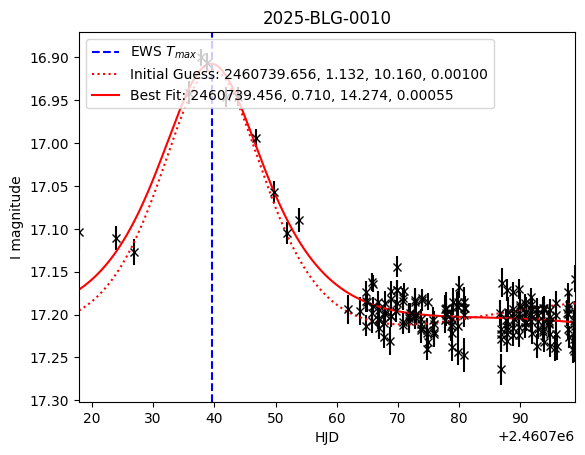

Time taken to fit the first 10: 66.47780156135559 seconds
1746798990.213321 63.9 66.47780156135559
Estimated season completion time: 15:07:18


In [15]:

# Function to process a single event
def process_event(i, ews_df, n, start_time, verbose=True, log_rho_prior=True):

    # Event stuff
    event = ews_df['Event'][i]
    event_start_time = time.time()
    url = ews_df['event data url'][i]
    data = fetch_event_data(url)

    # Model stuff
    t_0_0 = ews_df['Tmax (HJD)'][i]
    # We are going to change the next guesses from those provided by the EWS, to
    # give our optiizer some room to move
    u_0_0 = ews_df['Umin'][i] * 1.1  # initial guess
    t_E_0 = ews_df['tau'][i] * 1.1  # initial guess
    rho_0 = 0.001  # initial guess

    # Crop the data so that we don't have to fit 10 years worth
    t_window = (t_0_0 - 10.0 * t_E_0, t_0_0 + 10.0 * t_E_0)
    t_window = (max(min(data['HJD']), t_window[0]), min(max(data['HJD']), t_window[1]))
    # This creates a boolean mask: True for rows within the window, False otherwise
    time_mask = (data['HJD'] >= t_window[0]) & (data['HJD'] <= t_window[1])
    # Apply the mask to filter the DataFrame
    data = data[time_mask]

    if t_E_0 > 50:  # liekly remnant (they do derpy stuff in the wings)
        mag_method = finite_source_methods[0]  # Note: `finite_source_uniform_Gould94`
                                               # is not ideal for events where
                                               # rho ≲ 1e-3, but we use it here
                                               # to ensure fast and consistent
                                               # modeling while testing functions.
                                               # For high-mass lenses or precision
                                               # modeling, consider switching to
                                               # `WittMao94` variants (method 2
                                               # or 4).
    else:  # likely MS star
        mag_method = finite_source_methods[0]

    if verbose:
        print('\n', event)
        print('-----------------')
        print(f't_0_0: {t_0_0:1.3f}')
        print(f'u_0_0: {u_0_0:1.3f}')
        print(f't_E_0: {t_E_0:1.3f}')
        print(f'rho_0: {rho_0:1.5f}')
        print(f'Method = {mag_method}')
        print('-----------------')
        print(f'Time started: {time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())}')

    if i % n == 0:
        plt.close(i)
        plt.figure(i)

        plt.errorbar(data['HJD'],
                     data['I magnitude'],
                     yerr=data['magnitude error'],
                     fmt='x',
                     color='black'
                     )
        plt.axvline(ews_df['Tmax (HJD)'][i], color='blue', linestyle='--', label=r'EWS $T_{max}$')

        plt.title(event)

    # Data as a list of numpy arrays
    data_list = [data['HJD'].to_numpy(), data['I magnitude'].to_numpy(), data['magnitude error'].to_numpy()]

    # Pack everything into MulensModel objects
    data_object = MulensModel.MulensData(data_list=data_list,
                                plot_properties={'color': 'thistle',
                                                 'label': 'OGLE',
                                                 'marker': 'x',
                                                 'markersize': 2
                                                 },
                                phot_fmt='mag',
                                bandpass='I'
                                )
    fspl_model = MulensModel.Model({'t_0': t_0_0, 'u_0': u_0_0, 't_E': t_E_0, 'rho': rho_0})

    fspl_model.set_magnification_methods([t_window[0],
                                          mag_method,
                                          t_window[1]
                                          ],
                                          source=None
                                          )  # rho <= 0.1
    event_object = MulensModel.Event(datasets=data_object, model=fspl_model)

    # Plot the initial model
    if i % n == 0:
        event_object.plot_model(color='r',
                                linestyle=':',
                                t_range=[min(data['HJD']),
                                         max(data['HJD'])
                                         ],
                                label='Initial Guess: %1.3f, %1.3f, %1.3f, %1.5f' %(t_0_0, u_0_0, t_E_0, rho_0)
                                )

    # get initial chi2
    initial_chi2 = event_object.get_chi2()

    # index order
    parameters_to_fit = ["t_0", "u_0", "t_E", "rho"]
    if log_rho_prior:
        parameters_to_fit = ["t_0", "u_0", "t_E", "log_rho"]

    # Fit using scipy Nelder-Mead
    if log_rho_prior:
        result = minimize(mulens_neglogP_function,
                          [t_0_0, u_0_0, t_E_0, np.log10(rho_0)],
                          args=(parameters_to_fit,
                          event_object),
                          method='Nelder-Mead'
                          ) # log rho prior
    else:
        result = minimize(mulens_neglogP_function,
                          [t_0_0, u_0_0, t_E_0, rho_0],
                          args=(parameters_to_fit,
                          event_object),
                          method='Nelder-Mead'
                          )

    # Make sure the values in event_object are the best fit values
    neglogP_final = mulens_neglogP_function(result.x, parameters_to_fit, event_object, verbose=False)

    if verbose:
        print('-----------------')
        print(f'Time elapsed: {time.time() - event_start_time} seconds')
        print('-----------------')
        neglogP_final = mulens_neglogP_function(result.x, parameters_to_fit, event_object, verbose=True)
        print('-----------------')
        print(f't_0: {event_object.model.parameters.t_0:1.3f} ({result.x[0]:1.3f})')
        print(f'u_0: {event_object.model.parameters.u_0:1.3f} ({result.x[1]:1.3f})')
        print(f't_E: {event_object.model.parameters.t_E:1.3f} ({result.x[2]:1.3f})')
        print(f'rho: {event_object.model.parameters.rho:1.5f} ({result.x[3]:1.5f})') # Always rho here
        print('-----------------')
        print(f'Final -logP check: {neglogP_final}')
        print('-----------------')
        print(f'Initial chi2 (from initial guess): {initial_chi2}')
        print(f'Final chi2 (from event object): {event_object.get_chi2()}')
        print(f'Delta chi2: {event_object.get_chi2() - initial_chi2}')
        print('Delta chi2/dof: ',(event_object.get_chi2() - initial_chi2) / (len(data['HJD']) - 4))
        print('-----------------')


    # Plot the fit model and show (event_object now has correct params)
    if i % n == 0:
        # Construct the label string from the corrected event_object model state
        label = 'Best Fit: {0.t_0:1.3f}, {0.u_0:1.3f}, {0.t_E:1.3f}, {0.rho:1.5f}'.format(event_object.model.parameters)

        event_object.plot_model(color='r',
                                linestyle='-',
                                t_range=[min(data['HJD']), max(data['HJD'])],
                                label=label
                                )
        # Use parameters from the event object model for plot limits etc.
        t_0 = event_object.model.parameters.t_0
        t_E = event_object.model.parameters.t_E
        # Define plot window based on final params or keep original? Your choice.
        # Using original t_window:
        plt.xlim(max(min(data['HJD']), t_window[0]),
                 min(max(data['HJD']), t_window[1])
                 )
        plt.legend(loc='upper left')
        plt.xlabel('HJD')
        plt.ylabel('I magnitude')
        plt.savefig(f'./{event}.png', bbox_inches='tight')
        plt.show()

    # Return the actual best-fit parameters found by minimize
    # You might want to return the converted values for consistency
    final_params_values = list(result.x)
    if log_rho_prior:
        log_rho_idx = parameters_to_fit.index('log_rho')
        final_params_values[log_rho_idx] = 10**final_params_values[log_rho_idx] # Convert log_rho back to rho

    event_object.fit_fluxes() # This needs the model parameters to be set correctly
    ([FS], FB) = event_object.get_flux_for_dataset(event_object.datasets[0])
    final_params_values.append(FS)
    final_params_values.append(FB)

    return i, final_params_values # Return values, maybe with rho always as rho


# numpy array for the fit params
fit_params = np.zeros((ews_df.shape[0], 6))

plot_fraction = 1.0
N=10

start_time = time.time()
for i in range(N):
    i, result = process_event(i,
                              ews_df,
                              int(1/plot_fraction),
                              start_time,
                              verbose=True,
                              log_rho_prior=True
                              )
    fit_params[i] = result

# Geez, how long is this going to take?
time_at_N = time.time()
time_for_N = time_at_N - start_time
print(f'Time taken to fit the first {N}: {time_for_N} seconds')

# Estimate completion time
completion_time = time_at_N + (ews_df.shape[0] - N) / N * time_for_N
print(time_at_N, (ews_df.shape[0] - N) / N, time_for_N)

# Print the completion time in human readable format hr:min:sec
print(f'Estimated season completion time: {time.strftime("%H:%M:%S", time.localtime(completion_time))}')
end_time = time.time()

### <font face="Helvetica" size="5"> 3.3 Priors </font>

We will now interpret the deeply non-physical result where the background flux is very negative.

Likely at least a few of your events had negative $F_{\textrm{B}}$ (*we're looking at you, 2025-BLG-0030*). This is a pretty common issue with single-lens modelling.

But what does it mean?

Nothing that makes any physical sense. If the blend is a little bit negative, that can be explained by systematics in the photometry (e.g. the background was measured with very faint star in it, so our flux scale was zeroed slightly wrong), but there is no reason for the blend to be very negative; we can't detect anti-photons.

So, how can we punish the optimizer for its sins? It's actually pretty simple. We punish it by adding a penalty to the objective function. If the penalty is too abrupt, it can sometimes interfere with a gradient descent optimizer's ability to calculate gradients. But if we put a gradual penalty on it, the penalty acts to lead the optimizer in the right direction. The exact shape of the penalty doesn't really matter, it just needs to make more sense than giant negative fluxes.

This kind of penalty behaviour is called a prior. Where we use prior knowledge to inform the most probability landscape. Basically we tell optimization, “a very negative blend is dumb - don't do that.”

You might argue that you would prefer to approach your modelling from an agnostic perspective and I appreciate your integrity. The problem with that argument though is the assumption that no prior is agnostic. Because no prior is like telling your optimizer, "negative blend is just as reasonable as positive blend." That's not agnostic. You've still informed the fit. You just informed it that every solution was equally possible, which you know it's not. This not-actually-agnostic prior, where you don't code in any sort of penalties, is called a uniform prior. The concept of "no prior" is a fallacy.

So let's put a reasonable prior on the blend flux so that it stops acting up. Our other fit parameters can continue to have truncated priors (bounds).

The next question you might ask is, "how do I know which prior is the right prior" the answer to that is: vibes.
I'm not even joking. You choose a prior that is physically informed or informed by your "prior knowledge" of what your solution should be and don't worry overly much about it. You should however, always be wary that your priors are not so strong that they dominate the fit. If what you get out from a fit is very similar to your prior, that is an indication that you have been too heavy handed and you need to loosen the leash.

For example, if you made your prior a hard bound, requiring $F_{\textrm{B}}>0$, and your best fit solution was $F_{\textrm{B}}\approx0$, you have likely stopped the optimizer from exploring valid parameter space.

> Exercise X
>
> Edit `mulens_neglogP_function` to use a gaussian prior to constrain the blend flux, if it is below 0; use a piecewise prior combining:
>
> * A uniform prior for $F_\textrm{B}>0$
> * A Gaussian penalty for $F_\textrm{B}<0$


### <font face="Helvetica" size="5"> 3.4 Parallel Processing </font>

We are going to demonstrate speeding this process up with parallel processing. However, there are a few things you should know first.

We're going to demonstrate how to speed up batch fitting using parallel processing. But before we dive in, there are a few things you should know.

If you're running this notebook on Google Colab, your code is executing on a cloud-based virtual machine. Colab typically allocates only two CPU cores per session. While we can parallelize across these, the speed-up won't be dramatic.

If you have Jupyter and Python installed on your local machine, you can run this notebook there to take advantage of your full hardware.

Want to keep the Colab interface but use your local computer's power?
You can connect to a local runtime by following [these instructions](https://research.google.com/colaboratory/local-runtimes.html).
This allows Colab to use your local machine's resources while maintaining the notebook interface.

⚠️ If you choose this route, your notebook will use local packages. You should install the required environment using the provided `.yml` file and `conda` (or your preferred environment manager). See the setup instructions at the start of this notebook.

This notebook uses the `pathos` package for parallelization.
In scripts, you'll more commonly see `multiprocessing` used—it has a very similar interface. However, multiprocessing has known issues inside Jupyter notebooks, which is why we're using pathos instead.

Pathos is great for educational work in notebooks, but it has quirks. For example:
* It caches the function you give it the first time you run it.
* If you change that function afterward, it won't update unless you restart the kernel.

That's why we finalized our `fit_event()` function earlier—so we could parallelize it now with confidence.

In general, we don't recommend using all available cores for parallelization:

```python
with Pool(processes=mp.cpu_count()) as pool:
```

This often results in slower execution, as the system spends time managing threads instead of doing actual computation. It's usually better to leave **one core free** for system processes:

```python
with Pool(processes=mp.cpu_count() - 1) as pool:
```

That said, Colab's VM only provides two cores, so `mp.cpu_count() - 1`  is pointless here. For now, let's just try a pathos batch run on 2 cores and compare the timing to the serial loop from earlier.

> **Exercise X**
>
> Test how different values of processes in the Pool() function affect your batch fitting time.
> Try using 1, 2, and maybe `mp.cpu_count()` if you're on your local runtime.
What's the fastest? What's the most efficient?

2

 2025-BLG-0001

----------------- t_0_0: 2460746.660

u_0_0: 0.140
t_E_0: 31.4292025-BLG-0005
-----------------
t_0_0: 2460742.481
u_0_0: 0.006
t_E_0: 39.866
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:56:31

rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:56:31
-----------------
Time elapsed: 1.0594358444213867 seconds
-----------------
FS: 5.1638718189597, FB: -0.007826684531989357
chi2 =  31.838179953622753
-----------------
t_0: 2460742.510 (2460742.510)
u_0: 0.006 (0.006)
t_E: 39.866 (39.866)
rho: 0.00100 (-3.00001)
-----------------
Final -logP check: 15.919089976811376
-----------------
Initial chi2 (from initial guess): 50.13442036228195
Final chi2 (from event object): 31.838179953622753
Delta chi2: -18.296240408659198
Delta chi2/dof:  -0.3101057696382915
-----------------
-----------------
Time elapsed: 1.7091069221496582 seconds
-----------------
FS: 8.87570731729936

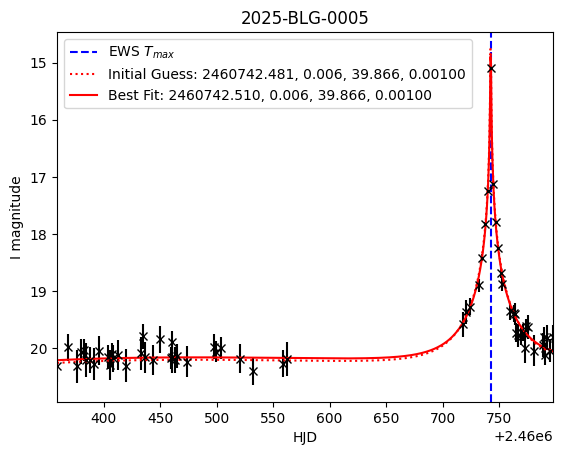

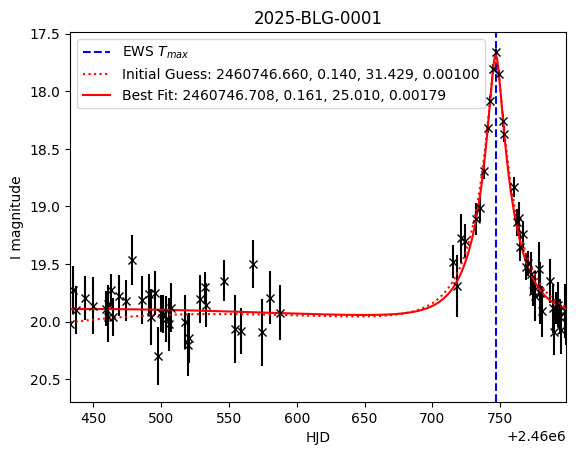


 2025-BLG-0002
-----------------
t_0_0: 2460708.786
u_0_0: 0.205
t_E_0: 97.239
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:56:33

 2025-BLG-0006
-----------------
t_0_0: 2460734.833
u_0_0: 0.000
t_E_0: 12.271
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:56:33
-----------------
Time elapsed: 2.173431634902954 seconds
-----------------
FS: 6.006408577535217, FB: 1.034869317700848
chi2 =  382.6612126880167
-----------------
t_0: 2460734.280 (2460734.280)
u_0: 0.003 (0.003)
t_E: 17.877 (17.877)
rho: 0.09443 (-1.02491)
-----------------
Final -logP check: 191.33060634400834
-----------------
Initial chi2 (from initial guess): 478.0389707081092
Final chi2 (from event object): 382.6612126880167
Delta chi2: -95.37775802009253
Delta chi2/dof:  -0.6274852501321877
-----------------


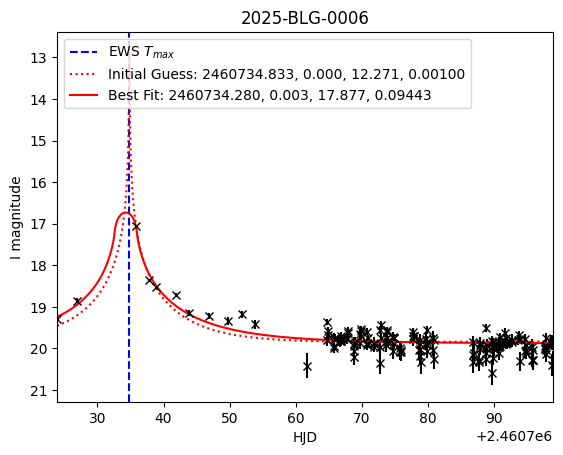


 2025-BLG-0007
-----------------
t_0_0: 2460762.856
u_0_0: 0.202
t_E_0: 152.284
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:56:36
-----------------
Time elapsed: 7.738630771636963 seconds
-----------------
FS: 36.832295613234734, FB: 40.47590023120118
chi2 =  11015.964648418543
-----------------
t_0: 2460762.849 (2460762.849)
u_0: 0.300 (0.300)
t_E: 93.153 (93.153)
rho: 0.00199 (-2.70167)
-----------------
Final -logP check: 5507.982324209272
-----------------
Initial chi2 (from initial guess): 12988.477147961425
Final chi2 (from event object): 11015.964648418543
Delta chi2: -1972.5124995428814
Delta chi2/dof:  -1.2320502807888079
-----------------


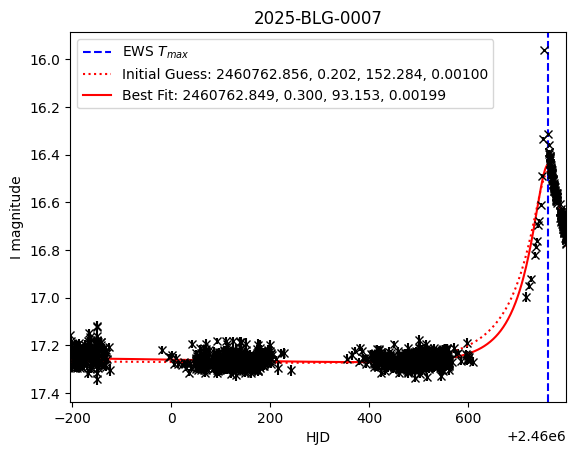


 2025-BLG-0008
-----------------
t_0_0: 2460738.278
u_0_0: 0.299
t_E_0: 21.072
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:56:45
-----------------
Time elapsed: 46.62743020057678 seconds
-----------------
FS: 6.121475358792154, FB: 10.415400723981893
chi2 =  160.6192075611816
-----------------
t_0: 2460717.537 (2460717.537)
u_0: 0.088 (0.088)
t_E: 116.846 (116.846)
rho: 0.00008 (-4.07826)
-----------------
Final -logP check: 80.3096037805908
-----------------
Initial chi2 (from initial guess): 266.4173236066316
Final chi2 (from event object): 160.6192075611816
Delta chi2: -105.79811604545
Delta chi2/dof:  -0.6080351496864943
-----------------


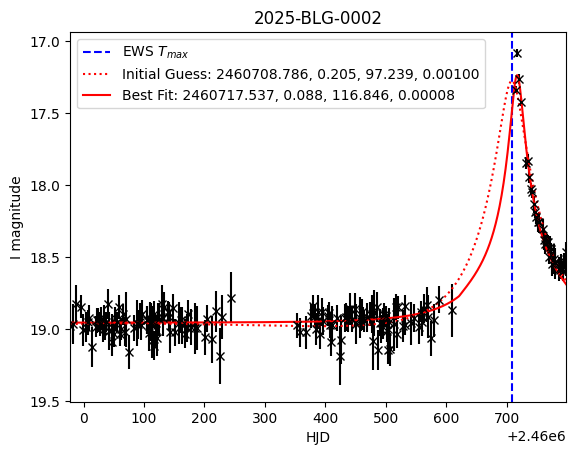

-----------------
Time elapsed: 36.645872831344604 seconds
-----------------
FS: 7.8529284227705, FB: -0.4405574448120968
chi2 =  560.756608727246

----------------- 2025-BLG-0003
t_0: 2460737.815 (2460737.815)
-----------------
u_0: 0.247 (0.247)

t_E: 27.338 (27.338)t_0_0: 2460737.016

u_0_0: 0.113rho: 0.00075 (-3.12403)

t_E_0: 21.432-----------------
rho_0: 0.00100

Method = finite_source_uniform_Gould94Final -logP check: 280.378304363623

-----------------
-----------------Time started: 2025-05-09 13:57:20

Initial chi2 (from initial guess): 597.0466519935691
Final chi2 (from event object): 560.756608727246
Delta chi2: -36.290043266323096
Delta chi2/dof:  -0.11520648655975586
-----------------


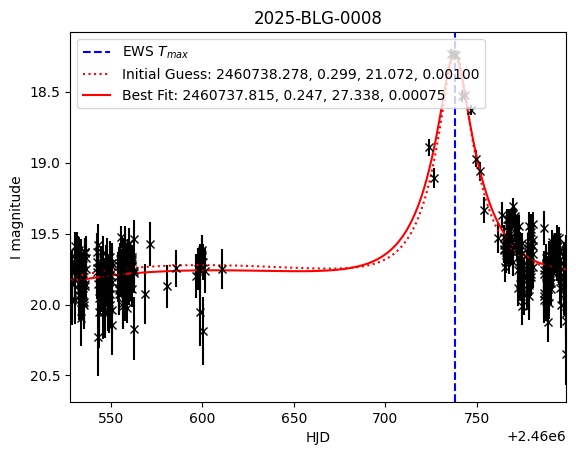

-----------------
Time elapsed: 1.7487750053405762 seconds
-----------------
FS: 4.940263321145879, FB: -0.6732878171742624
chi2 =  7.556199263672435
-----------------
t_0: 2460737.035 (2460737.035)
u_0: 0.110 (0.110)
t_E: 19.177 (19.177)
rho: 0.00086 (-3.06465)
-----------------
Final -logP check: 3.7780996318362177
-----------------
Initial chi2 (from initial guess): 11.351067477270423
Final chi2 (from event object): 7.556199263672435
Delta chi2: -3.7948682135979874
Delta chi2/dof:  -0.23717926334987421
-----------------


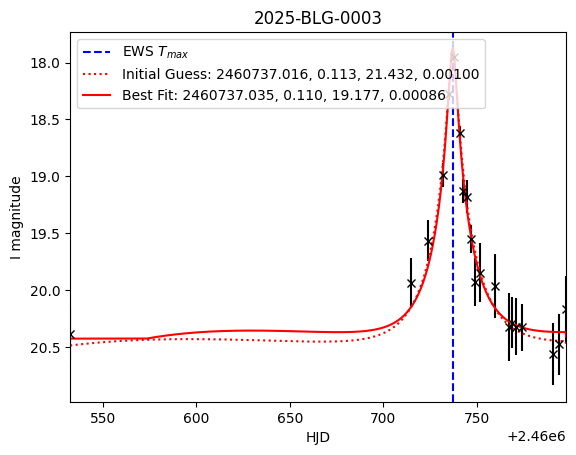


 2025-BLG-0004
-----------------
t_0_0: 2460703.874
u_0_0: 1.410
t_E_0: 71.577
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:57:23

 2025-BLG-0009
-----------------
t_0_0: 2460787.087
u_0_0: 0.820
t_E_0: 54.437
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:57:23
-----------------
Time elapsed: 5.324158668518066 seconds
-----------------
FS: 28.362840413711645, FB: 18.15664240769304
chi2 =  1340.9228696295922
-----------------
t_0: 2460787.607 (2460787.607)
u_0: 0.519 (0.519)
t_E: 71.293 (71.293)
rho: 0.00062 (-3.21082)
-----------------
Final -logP check: 670.4614348147961
-----------------
Initial chi2 (from initial guess): 1485.7549627157634
Final chi2 (from event object): 1340.9228696295922
Delta chi2: -144.8320930861712
Delta chi2/dof:  -0.18592053027749833
-----------------


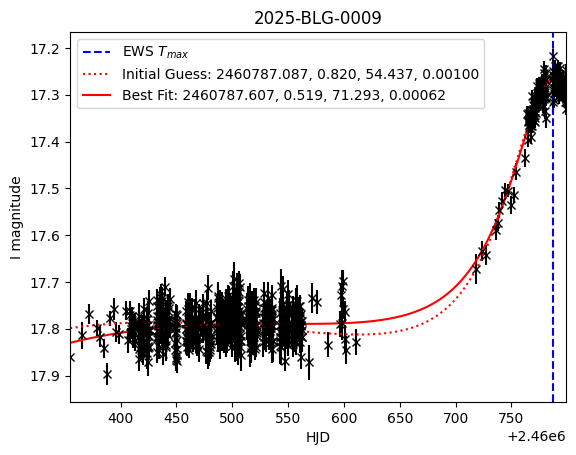


 2025-BLG-0010
-----------------
t_0_0: 2460739.656
u_0_0: 1.132
t_E_0: 10.160
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:57:29
-----------------
Time elapsed: 7.236078262329102 seconds
-----------------
FS: 31.664945236629578, FB: 160.6449861731316
chi2 =  156.8212518070667
-----------------
t_0: 2460725.391 (2460725.391)
u_0: 0.538 (0.538)
t_E: 83.782 (83.782)
rho: 0.00080 (-3.09852)
-----------------
Final -logP check: 78.41062590353334
-----------------
Initial chi2 (from initial guess): 365.2342955486718
Final chi2 (from event object): 156.8212518070667
Delta chi2: -208.41304374160512
Delta chi2/dof:  -1.218789729483071
-----------------


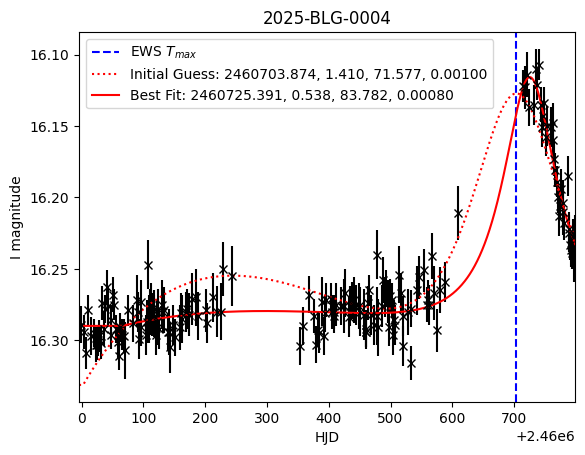

-----------------
Time elapsed: 3.1998836994171143 seconds
-----------------
FS: 43.17852769462783, FB: 36.80622344551977
chi2 =  355.1662299555353
-----------------
t_0: 2460739.456 (2460739.456)
u_0: 0.710 (0.710)
t_E: 14.274 (14.274)
rho: 0.00055 (-3.25621)
-----------------
Final -logP check: 177.58311497776765
-----------------
Initial chi2 (from initial guess): 571.8387607351775
Final chi2 (from event object): 355.1662299555353
Delta chi2: -216.67253077964222
Delta chi2/dof:  -1.2670908232727616
-----------------


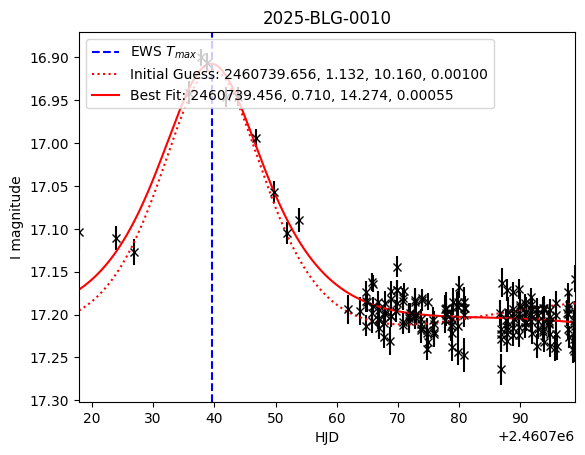


 2025-BLG-0013
-----------------
t_0_0: 2460737.760
u_0_0: 0.213
t_E_0: 32.407
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:57:31

 2025-BLG-0011
-----------------
t_0_0: 2460746.387
u_0_0: 0.760
t_E_0: 13.836
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:57:33
-----------------
Time elapsed: 2.1917998790740967 seconds
-----------------
FS: 28.41701132119318, FB: -7.1274154094919755
chi2 =  364.99406976374155
-----------------
t_0: 2460746.725 (2460746.725)
u_0: 0.772 (0.772)
t_E: 14.683 (14.683)
rho: 0.00186 (-2.72968)
-----------------
Final -logP check: 182.49703488187077
-----------------
Initial chi2 (from initial guess): 393.42706380632023
Final chi2 (from event object): 364.99406976374155
Delta chi2: -28.432994042578684
Delta chi2/dof:  -0.17232117601562838
-----------------


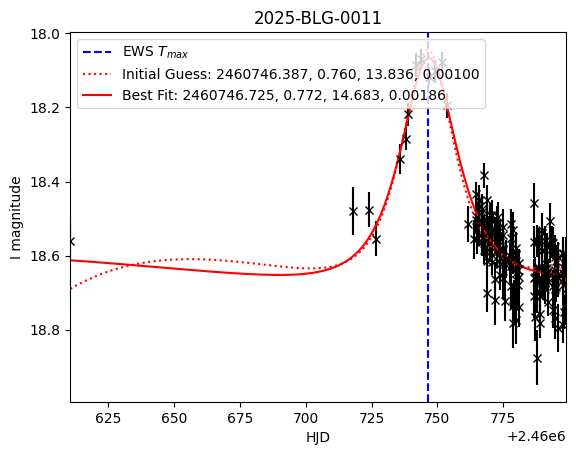


 2025-BLG-0012
-----------------
t_0_0: 2460759.432
u_0_0: 0.173
t_E_0: 36.858
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:57:36
-----------------
Time elapsed: 5.769543170928955 seconds
-----------------
FS: 203.80041472518036, FB: 36.11514868929253
chi2 =  2182.235254687227
-----------------
t_0: 2460759.440 (2460759.440)
u_0: 0.128 (0.128)
t_E: 39.624 (39.624)
rho: 0.00107 (-2.96885)
-----------------
Final -logP check: 1091.1176273436135
-----------------
Initial chi2 (from initial guess): 14766.373911793838
Final chi2 (from event object): 2182.235254687227
Delta chi2: -12584.13865710661
Delta chi2/dof:  -15.849041129857191
-----------------


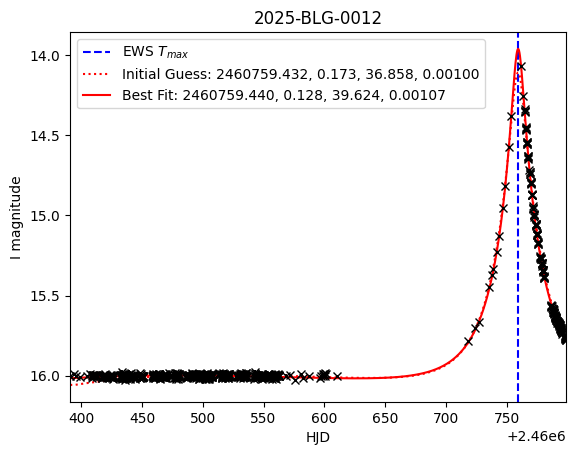


 2025-BLG-0017
-----------------
t_0_0: 2460772.569
u_0_0: 0.344
t_E_0: 34.917
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:57:43
-----------------
Time elapsed: 6.984665870666504 seconds
-----------------
FS: 62.68902684396896, FB: -18.132648226148877
chi2 =  1352.2261097309802
-----------------
t_0: 2460772.551 (2460772.551)
u_0: 0.373 (0.373)
t_E: 29.862 (29.862)
rho: 0.00152 (-2.81849)
-----------------
Final -logP check: 676.1130548654901
-----------------
Initial chi2 (from initial guess): 4654.758839274424
Final chi2 (from event object): 1352.2261097309802
Delta chi2: -3302.5327295434436
Delta chi2/dof:  -4.39166586375458
-----------------


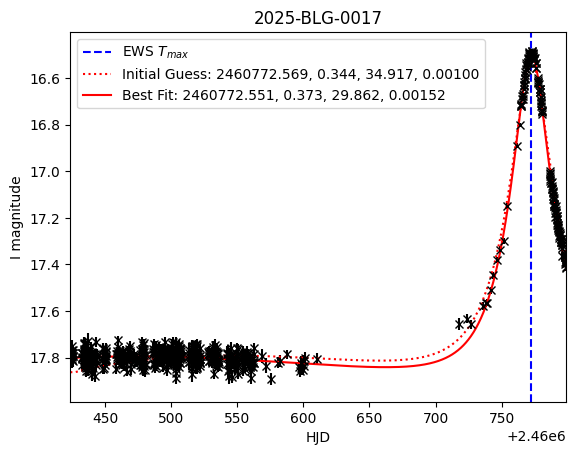


 2025-BLG-0018
-----------------
t_0_0: 2460720.837
u_0_0: 1.022
t_E_0: 42.679
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:57:51
-----------------
Time elapsed: 26.055902242660522 seconds
-----------------
FS: 6.553523373901973, FB: 5.655611642847646
chi2 =  1242.479524633931
-----------------
t_0: 2460737.628 (2460737.628)
u_0: 0.216 (0.216)
t_E: 29.179 (29.179)
rho: 0.00097 (-3.01529)
-----------------
Final -logP check: 621.2397623169655
-----------------
Initial chi2 (from initial guess): 1259.2200714156115
Final chi2 (from event object): 1242.479524633931
Delta chi2: -16.74054678168045
Delta chi2/dof:  -0.021769241588661184
-----------------


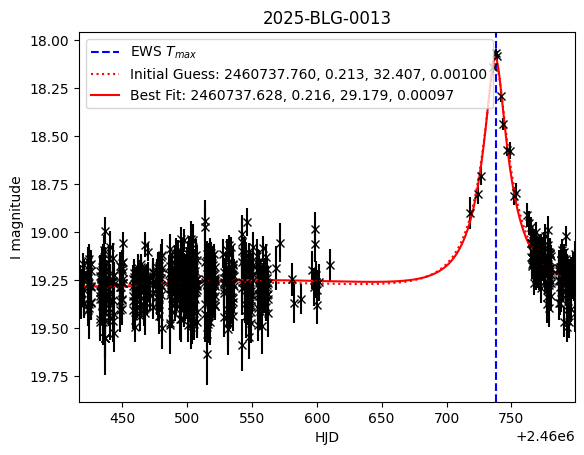


 2025-BLG-0014
-----------------
t_0_0: 2460757.172
u_0_0: 2.057
t_E_0: 99.658
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:58:00
-----------------
Time elapsed: 4.998551607131958 seconds
-----------------
FS: 9143.678017909728, FB: -6054.187147181287
chi2 =  18924.302709610434
-----------------
t_0: 2460760.690 (2460760.690)
u_0: 2.500 (2.500)
t_E: 100.456 (100.456)
rho: 0.00606 (-2.21728)
-----------------
Final -logP check: 9462.151354805217
-----------------
Initial chi2 (from initial guess): 67037.44619114723
Final chi2 (from event object): 18924.302709610434
Delta chi2: -48113.1434815368
Delta chi2/dof:  -61.604537108241736
-----------------


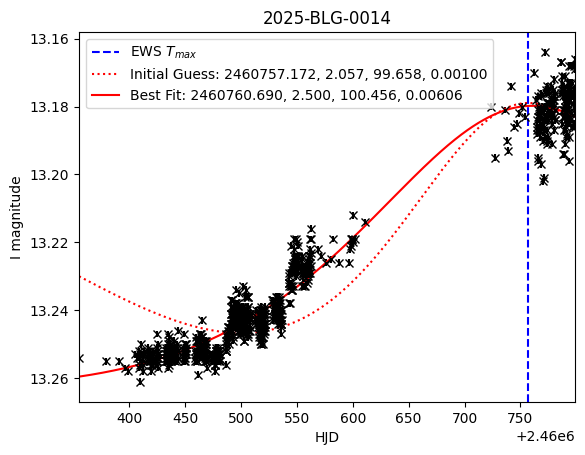


 2025-BLG-0015
-----------------
t_0_0: 2460717.434
u_0_0: 0.278
t_E_0: 37.483
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:58:06
-----------------
Time elapsed: 4.636900901794434 seconds
-----------------
FS: 74.09104123418408, FB: 54.038908906875065
chi2 =  1464.0283569723697
-----------------
t_0: 2460718.236 (2460718.236)
u_0: 0.162 (0.162)
t_E: 45.448 (45.448)
rho: 0.00084 (-3.07440)
-----------------
Final -logP check: 732.0141784861848
-----------------
Initial chi2 (from initial guess): 2746.4279614774873
Final chi2 (from event object): 1464.0283569723697
Delta chi2: -1282.3996045051176
Delta chi2/dof:  -1.6232906386140729
-----------------


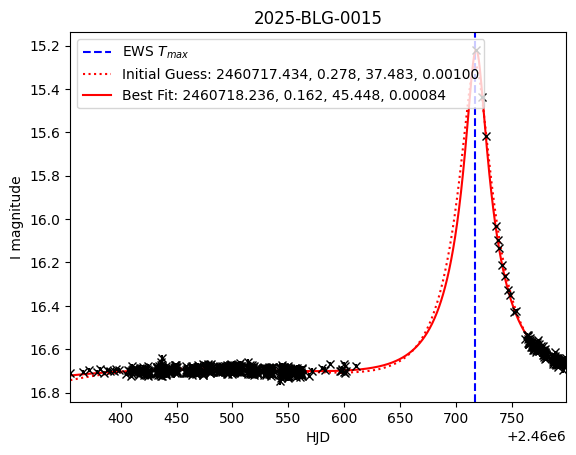


 2025-BLG-0016
-----------------
t_0_0: 2460808.203
u_0_0: 1.438
t_E_0: 49.402
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:58:12
-----------------
Time elapsed: 4.887367248535156 seconds
-----------------
FS: 88.72629546717273, FB: 22.052617062977337
chi2 =  1616.7861162673257
-----------------
t_0: 2460842.742 (2460842.742)
u_0: 0.945 (0.945)
t_E: 90.544 (90.544)
rho: 0.00065 (-3.18688)
-----------------
Final -logP check: 808.3930581336629
-----------------
Initial chi2 (from initial guess): 2094.056832570339
Final chi2 (from event object): 1616.7861162673257
Delta chi2: -477.27071630301316
Delta chi2/dof:  -0.6583044362800181
-----------------


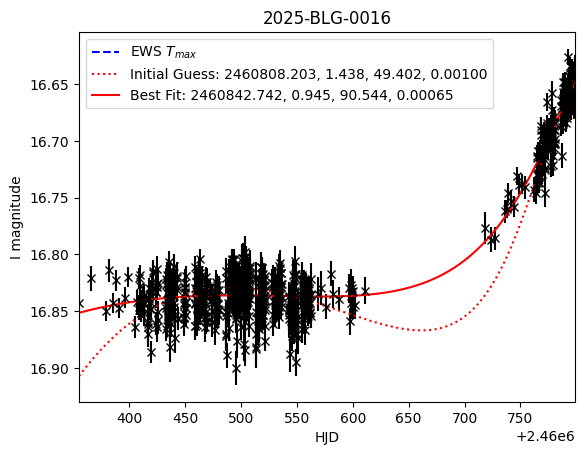


 2025-BLG-0021
-----------------
t_0_0: 2460745.735
u_0_0: 0.096
t_E_0: 19.402
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:58:18
-----------------
Time elapsed: 4.086262226104736 seconds
-----------------
FS: 6.191301493871677, FB: 13.631236219918076
chi2 =  422.97220338945374
-----------------
t_0: 2460745.731 (2460745.731)
u_0: 0.078 (0.078)
t_E: 19.205 (19.205)
rho: 0.00164 (-2.78453)
-----------------
Final -logP check: 211.48610169472687
-----------------
Initial chi2 (from initial guess): 449.406684711683
Final chi2 (from event object): 422.97220338945374
Delta chi2: -26.43448132222926
Delta chi2/dof:  -0.11443498407891455
-----------------


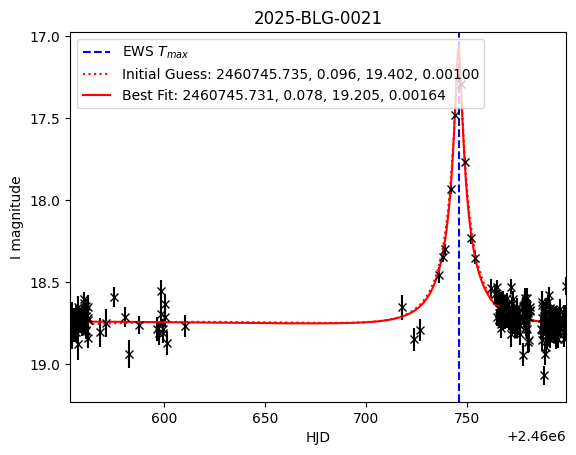


 2025-BLG-0022
-----------------
t_0_0: 2460743.052
u_0_0: 1.630
t_E_0: 21.391
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:58:23
-----------------
Time elapsed: 15.404064178466797 seconds
-----------------
FS: 4.009665869538282, FB: 94.48861633472617
chi2 =  1345.146375606278
-----------------
t_0: 2460745.299 (2460745.299)
u_0: 0.222 (0.222)
t_E: 52.792 (52.792)
rho: 0.00040 (-3.39552)
-----------------
Final -logP check: 672.573187803139
-----------------
Initial chi2 (from initial guess): 1700.5791547070169
Final chi2 (from event object): 1345.146375606278
Delta chi2: -355.4327791007388
Delta chi2/dof:  -1.1392076253228807
-----------------


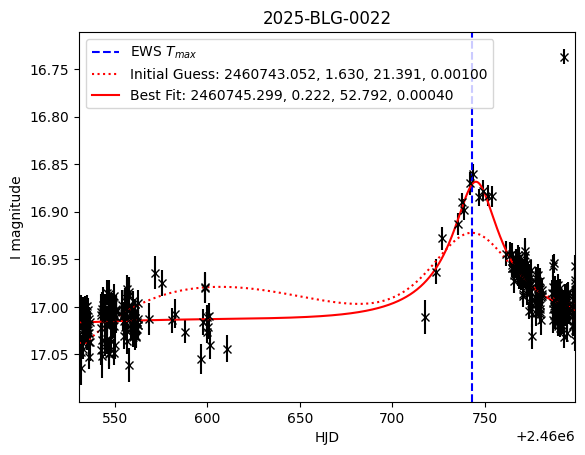


 2025-BLG-0023
-----------------
t_0_0: 2460747.255
u_0_0: 0.032
t_E_0: 11.949
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:58:40
-----------------
Time elapsed: 2.0483016967773438 seconds
-----------------
FS: 23.139235576693963, FB: 9.085179347616505
chi2 =  305.57751988143303
-----------------
t_0: 2460747.209 (2460747.209)
u_0: 0.032 (0.032)
t_E: 11.949 (11.949)
rho: 0.00100 (-3.00004)
-----------------
Final -logP check: 152.78875994071652
-----------------
Initial chi2 (from initial guess): 419.69464824685446
Final chi2 (from event object): 305.57751988143303
Delta chi2: -114.11712836542142
Delta chi2/dof:  -0.6792686212227466
-----------------


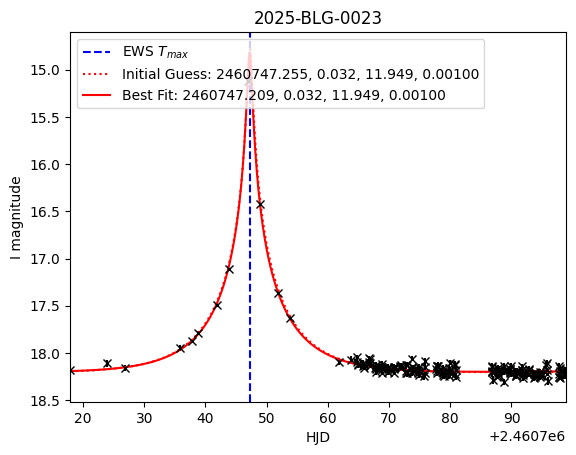


 2025-BLG-0024
-----------------
t_0_0: 2460741.798
u_0_0: 1.552
t_E_0: 13.190
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:58:44
-----------------
Time elapsed: 3.6168529987335205 seconds
-----------------
FS: 7.800507814279872, FB: 88.92002792508347
chi2 =  207.48919428754272
-----------------
t_0: 2460742.333 (2460742.333)
u_0: 0.343 (0.343)
t_E: 26.534 (26.534)
rho: 0.01033 (-1.98595)
-----------------
Final -logP check: 103.74459714377136
-----------------
Initial chi2 (from initial guess): 291.2518889230041
Final chi2 (from event object): 207.48919428754272
Delta chi2: -83.7626946354614
Delta chi2/dof:  -0.8293336102520931
-----------------


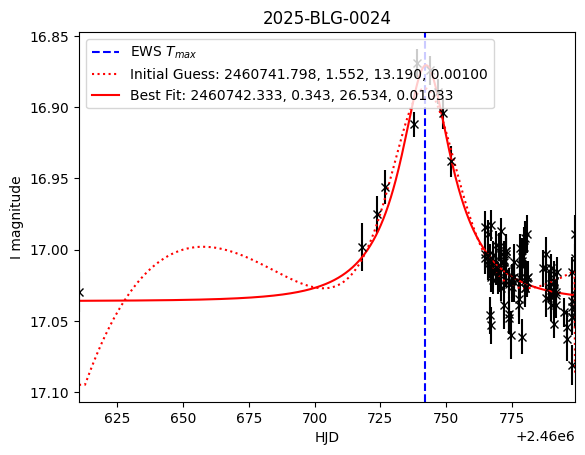


 2025-BLG-0025
-----------------
t_0_0: 2460737.267
u_0_0: 0.732
t_E_0: 17.994
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:58:47
-----------------
Time elapsed: 14.579065561294556 seconds
-----------------
FS: 14.701207853784203, FB: 1.4021307592314753
chi2 =  667.5222762737026
-----------------
t_0: 2460734.919 (2460734.919)
u_0: 0.613 (0.613)
t_E: 17.361 (17.361)
rho: 0.00048 (-3.31576)
-----------------
Final -logP check: 333.7611381368513
-----------------
Initial chi2 (from initial guess): 744.1277632441129
Final chi2 (from event object): 667.5222762737026
Delta chi2: -76.60548697041031
Delta chi2/dof:  -0.3613466366528788
-----------------


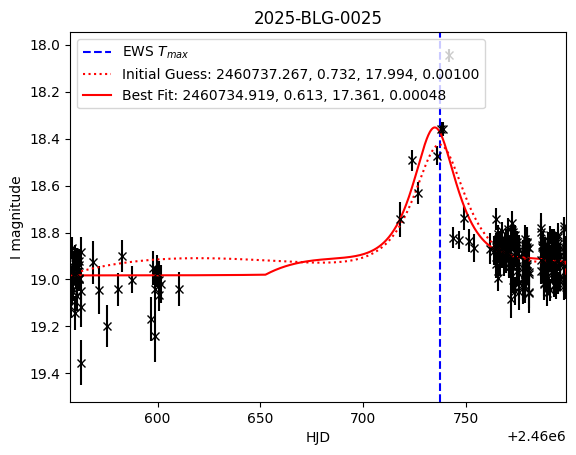


 2025-BLG-0026
-----------------
t_0_0: 2460746.882
u_0_0: 0.179
t_E_0: 35.369
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:59:04
-----------------
Time elapsed: 8.01764988899231 seconds
-----------------
FS: 3.9225089342809105, FB: 11.390421365210468
chi2 =  1229.660463415309
-----------------
t_0: 2460746.899 (2460746.899)
u_0: 0.173 (0.173)
t_E: 30.791 (30.791)
rho: 0.00272 (-2.56534)
-----------------
Final -logP check: 614.8302317076545
-----------------
Initial chi2 (from initial guess): 1269.20539456827
Final chi2 (from event object): 1229.660463415309
Delta chi2: -39.544931152961
Delta chi2/dof:  -0.04993046862747601
-----------------


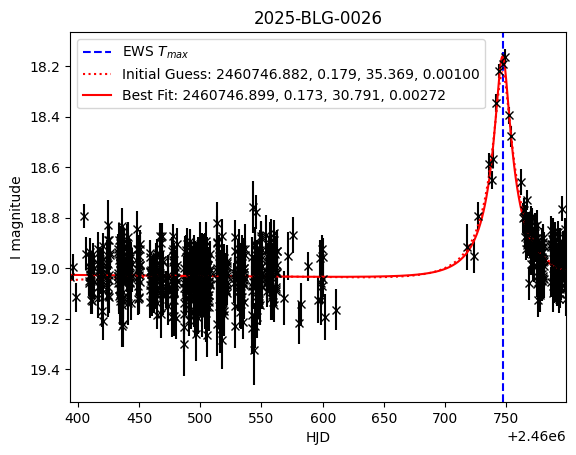


 2025-BLG-0027
-----------------
t_0_0: 2460717.064
u_0_0: 1.048
t_E_0: 24.678
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:59:12
-----------------
Time elapsed: 113.08958387374878 seconds
-----------------
FS: 37.9507931098399, FB: 18.530958412526168
chi2 =  2427.042502291024
-----------------
t_0: 2460717.888 (2460717.888)
u_0: 0.711 (0.711)
t_E: 47.098 (47.098)
rho: 0.00042 (-3.37645)
-----------------
Final -logP check: 1213.521251145512
-----------------
Initial chi2 (from initial guess): 3756.550660741824
Final chi2 (from event object): 2427.042502291024
Delta chi2: -1329.5081584507998
Delta chi2/dof:  -1.6598104350197251
-----------------


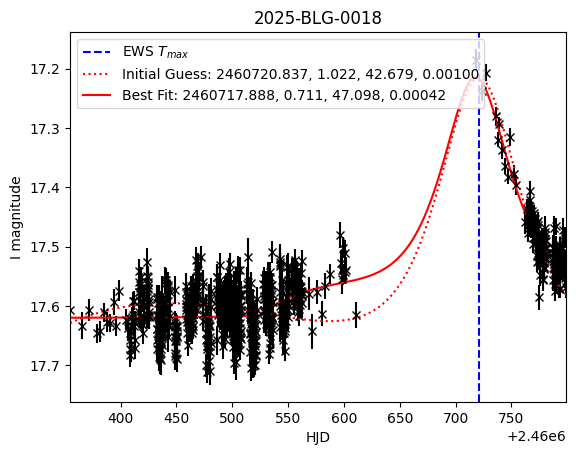


 2025-BLG-0019
-----------------
t_0_0: 2460762.637
u_0_0: 0.883
t_E_0: 35.924
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 13:59:46
-----------------
Time elapsed: 20.03665590286255 seconds
-----------------
FS: 13.86821658002556, FB: 12.22961234677046
chi2 =  1101.9523480456812
-----------------
t_0: 2460762.981 (2460762.981)
u_0: 0.561 (0.561)
t_E: 40.374 (40.374)
rho: 0.00071 (-3.14973)
-----------------
Final -logP check: 550.9761740228406
-----------------
Initial chi2 (from initial guess): 1281.9442449074804
Final chi2 (from event object): 1101.9523480456812
Delta chi2: -179.9918968617992
Delta chi2/dof:  -0.22812661199214093
-----------------


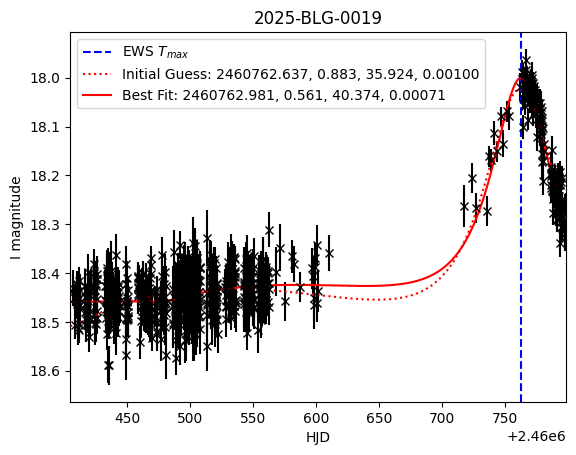


 2025-BLG-0020
-----------------
t_0_0: 2460778.551
u_0_0: 0.172
t_E_0: 96.919
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 14:00:09
-----------------
Time elapsed: 152.8729329109192 seconds
-----------------
FS: 16.807442164274747, FB: 86.3208654501423
chi2 =  1274.512460174757
-----------------
t_0: 2460716.647 (2460716.647)
u_0: 0.297 (0.297)
t_E: 46.735 (46.735)
rho: 0.00012 (-3.91118)
-----------------
Final -logP check: 637.2562300873785
-----------------
Initial chi2 (from initial guess): 3294.736839471986
Final chi2 (from event object): 1274.512460174757
Delta chi2: -2020.224379297229
Delta chi2/dof:  -3.501255423392078
-----------------


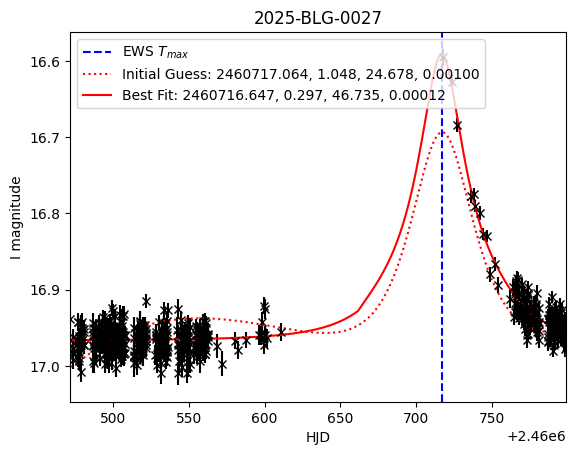


 2025-BLG-0028
-----------------
t_0_0: 2460743.636
u_0_0: 0.314
t_E_0: 78.906
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 14:01:47
-----------------
Time elapsed: 8.883098125457764 seconds
-----------------
FS: 19.040536324318737, FB: 5.033217081292607
chi2 =  1959.466404824704
-----------------
t_0: 2460743.495 (2460743.495)
u_0: 0.231 (0.231)
t_E: 85.695 (85.695)
rho: 0.00089 (-3.05072)
-----------------
Final -logP check: 979.733202412352
-----------------
Initial chi2 (from initial guess): 2120.8940350114704
Final chi2 (from event object): 1959.466404824704
Delta chi2: -161.42763018676646
Delta chi2/dof:  -1.2322719861585227
-----------------


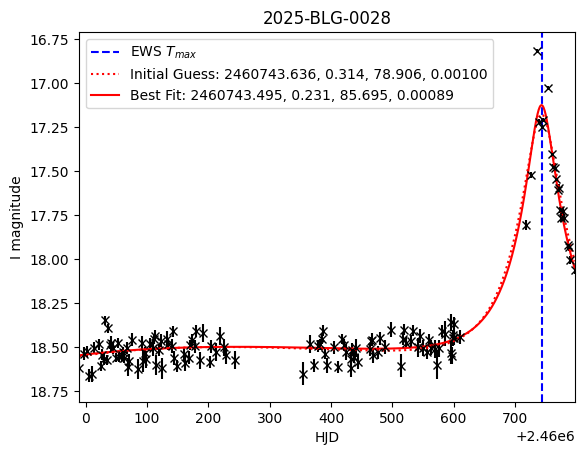


 2025-BLG-0029
-----------------
t_0_0: 2460694.279
u_0_0: 0.227
t_E_0: 56.602
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 14:01:57
-----------------
Time elapsed: 2.512176752090454 seconds
-----------------
FS: 171.07795604663866, FB: 148.9121229303519
chi2 =  283.2871450388348
-----------------
t_0: 2460694.906 (2460694.906)
u_0: 0.033 (0.033)
t_E: 67.141 (67.141)
rho: 0.00089 (-3.05048)
-----------------
Final -logP check: 141.6435725194174
-----------------
Initial chi2 (from initial guess): 563.6543609411314
Final chi2 (from event object): 283.2871450388348
Delta chi2: -280.36721590229655
Delta chi2/dof:  -2.7759130287356095
-----------------


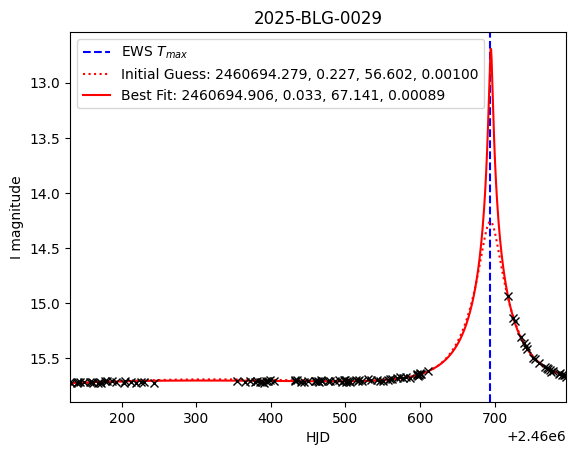


 2025-BLG-0030
-----------------
t_0_0: 2460743.752
u_0_0: 1.473
t_E_0: 41.699
rho_0: 0.00100
Method = finite_source_uniform_Gould94
-----------------
Time started: 2025-05-09 14:02:01
-----------------
Time elapsed: 3.1968090534210205 seconds
-----------------
FS: 480.80790458659396, FB: 598.0607174418412
chi2 =  5111.691550158014
-----------------
t_0: 2460745.671 (2460745.671)
u_0: 0.852 (0.852)
t_E: 56.259 (56.259)
rho: 0.00082 (-3.08505)
-----------------
Final -logP check: 2555.845775079007
-----------------
Initial chi2 (from initial guess): 10005.2215031208
Final chi2 (from event object): 5111.691550158014
Delta chi2: -4893.5299529627855
Delta chi2/dof:  -52.05882928683814
-----------------


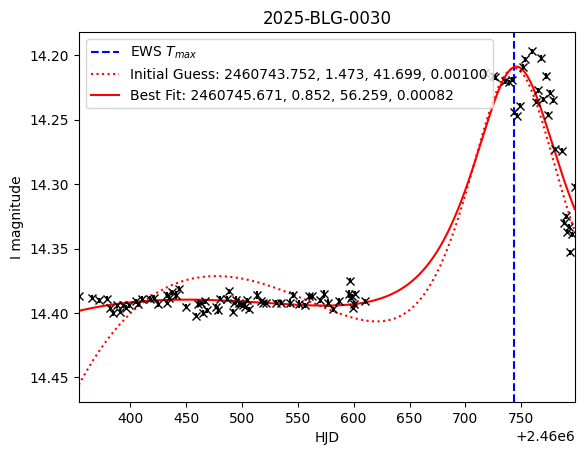

-----------------
Time elapsed: 228.57167792320251 seconds
-----------------
FS: 85.82219529597037, FB: 32.15934203427237
chi2 =  5319.783301618213
-----------------
t_0: 2460778.669 (2460778.669)
u_0: 0.167 (0.167)
t_E: 79.153 (79.153)
rho: 0.00034 (-3.46421)
-----------------
Final -logP check: 2659.8916508091065
-----------------
Initial chi2 (from initial guess): 21579.605226787717
Final chi2 (from event object): 5319.783301618213
Delta chi2: -16259.821925169505
Delta chi2/dof:  -10.469943287295237
-----------------


In [ ]:
# Main function to parallelize the processing
def run_parallel_processing(plot_fraction=None, kill_after=None):
    # numpy array for the fit params
    fit_params = np.zeros((ews_df.shape[0], 6))

    if plot_fraction is None:
        plot_fraction = 0.1
    if kill_after is None:
        kill_after = 30

    start_time = time.time()

    # Create a pool of worker processes
    print(mp.cpu_count())
    with Pool(processes=mp.cpu_count()) as pool: # if running locally, keep the
                                                 # process count < mp.cpu_count()
                                                 # or it will be very slow
        results = pool.map(lambda i: process_event(i, ews_df, N*plot_fraction, start_time), range(kill_after))
        for i, params in results:
            fit_params[i] = params

    print("Total time:", time.time() - start_time)

    # Save fit_params if needed
    # np.save('fit_params.npy', fit_params)

    return fit_params

# Run the parallel processing function
#fit_params = run_parallel_processing() # test run
fit_params = run_parallel_processing(kill_after=10) # test run
#fit_params = run_parallel_processing(kill_after=ews_df.shape[0],
#                                     plot_fraction=0.01
#                                     ) # full run

#print(fit_params[:n_10])

In [ ]:
fit_params[:N]

In [ ]:
plt.close(99)
plt.figure(99)
fig, axes = plt.subplots(6, 1, figsize=(5, 25))

# t_0 values
min_t0 = min(fit_params[:N, 0])
max_t0 = max(fit_params[:N, 0])
print(min_t0, max_t0)
axes[0].hist(fit_params[:N, 0], bins=20)
axes[0].set_xlabel(r'$t_0$')
axes[0].set_ylabel('Frequency')
#log the y axis
#axes[0].set_yscale('log')

# u0 values
min_u0 = min(fit_params[:N, 1])
max_u0 = max(fit_params[:N, 1])
print(min_u0, max_u0)
axes[1].hist(fit_params[:N, 1], bins=20)
axes[1].set_xlabel(r'$u_0$')
axes[1].set_ylabel('Frequency')
#axes[1].set_yscale('log')

# tE values
min_tE = min(fit_params[:N, 2])
max_tE = max(fit_params[:N, 2])
print(min_tE, max_tE)
axes[2].hist(fit_params[:N, 2], bins=20)
axes[2].set_xlabel(r'$t_\text{E}$')
axes[2].set_ylabel('Frequency')
#axes[2].set_yscale('log')

# rho values
min_rho = min(fit_params[:N, 3])
max_rho = max(fit_params[:N, 3])
print(min_rho, max_rho)
print(np.log10(min_rho), np.log10(max_rho))
axes[3].hist(np.log10(fit_params[:N, 3]), bins=20)
axes[3].set_xlabel(r'$\rho$')
axes[3].set_ylabel('Frequency')
#axes[3].set_yscale('log')

# FS values
min_FS = min(fit_params[:N, 4])
max_FS = max(fit_params[:N, 4])
print(min_FS, max_FS)
axes[4].hist(fit_params[:N, 4], bins=20)
axes[4].set_xlabel(r'$F_\text{S}$')
axes[4].set_ylabel('Frequency')
#[4].set_yscale('log')

# FB values
min_FB = min(fit_params[:N, 5])
max_FB = max(fit_params[:N, 5])
print(min_FB, max_FB)
axes[5].hist(fit_params[:N, 5], bins=20)
axes[5].set_xlabel(r'$F_\text{B}$')
axes[5].set_ylabel('Frequency')
##axes[5].set_yscale('log')

plt.show()

In beta testing, the timing results for fitting 30 events were:

| Processing | Cores | Events (N) | Plots | Time |
| :-: | :-: | :-: | :-: | :-: |
| Serial | 1 | 30 | 10% | 104s |
| Parallel | 2 | 30 | 10% | 94s |

A modest improvement, considering the extra coding overhead. However, on a local machine with more cores:

| Processing | Cores | Events (N) | Plots | Time |
| :-: | :-: | :-: | :-: | :-: |
| Serial | 1 | 30 | 10% | s |
| Parallel | 7 | 30 | 10% |	s |

This shows the real power of parallelisation—when the hardware can actually support it.

If you even encounter this kind of problem in the wild, where you a very parallelisable job with limited time to implement parallelization, it's always worth considering poor-man parallelisation:
Break the job into batches, run multiple scripts or terminals at once, and let your operating system juggle the rest.

If your code is loop heavy, look for vectorisation opportunities using `numpy`.
Or `cython`, if that's not an option.

Now that you've seen how parallelisation affects efficiency, you're ready to run a full-season fit.
However, if you're short on time, it's entirely reasonable to skip this exercise.

> **Exercise X**
>
> Use the more efficient method (serial or parallel) to process the full season of EWS data.
> Plot histograms of the resulting parameter distributions (e.g., $t_\textrm{E}$, $u_0$, etc.).
> Look for trends. Look for outliers.

### <font face="Helvetica" size="5"> 3.4 Custom Event Finder </font>

If we weren't borrowing initial fit parameters from the OGLE EWS, these fits would fail completely under downhill optimizers. Starting too far from the truth in parameter space means the optimizer gets trapped in local minima - the peaks and valleys of the likelihood landscape become a cage, not a guide.

We'll explore more robust (and computationally expensive) methods in the next section. But even with advanced samplers, having a good initial guess makes the entire process faster, more stable, and more scientifically honest.

Different ground-based surveys use different strategies to identify microlensing events in stellar light curves. You, however, have a luxury they don't: you already know which light curves contain events. That means your challenge isn't classification—it's localization.

And the most critical parameter to localize is $t_0$.  
Other parameters (like $u_0$, $t_\textrm{E}$, and $\rho$) can be guessed with population-based heuristics. But if your $t_0$ is wrong, your fit will miss the peak entirely - and what you get back will be noise-dressed nonsense.

This is a central problem in bulk fitting single-lens microlensing events:  
> We need an event-finding algorithm to guess $t_0$ accurately.

You now have:
- A full season of OGLE data
- Light curves that are guaranteed to contain events
- A set of academic papers describing common event-finding strategies:
  - [OGLE Early Warnign System (EWS)](https://ui.adsabs.harvard.edu/abs/1994AcA....44..227U/abstract)
  - [KMTNet Alert Finder](https://ui.adsabs.harvard.edu/abs/2018arXiv180607545K/abstract)
  - [KMTNet Event Finder](https://ui.adsabs.harvard.edu/abs/2018AJ....155...76K/abstract)
  - [KMTNet Anomaly Finder](https://ui.adsabs.harvard.edu/abs/2021AJ....162..163Z/abstract)
  - [RTModel (Real-Time Modeling)](https://ui.adsabs.harvard.edu/abs/2024A%26A...688A..83B/abstract) (see their section 4)

Do you think you can do better?

> **Exercise X**
>
> Write an algorithm to estimate $t_0$ for microlensing events.  
> Keep it simple. Keep it efficient.  
> The rest of your fit may depend on it.

In [ ]:
#@title Your code goes here

### <font face="Helvetica" size="5">3.4 Advanced Modeling Techniques and Higher-Order Models</font>

The idea that a good $t_0$ guess is enough for a good fit holds true for FSPL events. But when an FSPL model fails to fit cleanly, that's often a sign that higher-order effects are at play. You've encountered some of these in other chapters of this course.

We know that binary stars are common in the galaxy. And yet, we often model events using PSPL or FSPL, as if single-lens-single-source events are the default. In fact, recent simulations of ground-based surveys using modern Galactic models suggest that around 50% of single-peaked microlensing events are actually "hidden binaries"—either:
- **Binary lenses** (multiple objects in the lens system), or  
- **Binary sources** (two source stars lensed simultaneously).

#### <font face="Helvetica" size="4"> Binary source stars </font>
They introduce subtle distortions to the light curve and can easily masquerade as single-lens, binary-lens events.  

If you'd like to learn more, see this [notebook on binary sources](https://github.com/AmberLee2427/TheMicrolensersGuideToTheGalaxy/blob/main/Notebooks/BinarySource.ipynb).

#### <font face="Helvetica" size="4"> Binary lenses </font>
These are a different beast entirely. They require:
- Higher-order models
- Optimizers that can escape local minima (e.g. **Monte Carlo** methods that allow uphill steps)

  ([This notebook](https://github.com/AmberLee2427/TheMicrolensersGuideToTheGalaxy/blob/main/Notebooks/Modelling.ipynb) on modelling methods commonly used in microlensing may also be of interest)
- Often a **grid search** in $s$, $q$, and $\rho$ to even get reasonable initial conditions

Even with that, **degeneracies are common** — and easy to miss. For example, see the modeling of OGLE-2016-BLG-1195 (Shartzvald et al., 2017; Bond et al., 2017; Gould et al., 2023; Vandorou et al., 2024), where a viable degenerate solutions were overlooked at each stage of modelling.

If a light curve shows dramatic deviations from a Paczyński shape, you're **almost certainly dealing with a binary lens** (unless some other astrophysical event has contaminated your lightcurve). But determining the *correct* model requires balancing:
- Evidence for complexity, and  
- The principle of parsimony (Occam's Razor), while knowing full well that these “complex” models are not **rare.**

---

For more on Bayesian modeling and MC methods in microlensing, see our [modeling notebook](https://github.com/AmberLee2427/TheMicrolensersGuideToTheGalaxy/blob/main/Notebooks/Modelling.ipynb).

---

#### Other higher-order effects not covered in this course (but worth knowing):
- **Lens orbital motion**  
- **Xallarap** (source orbital motion)  
- **Multiple lenses** (e.g. triple lenses)  
- **Variable stars** (source, lens, or blend stars with intrinsic variability)  
- Variable **blending** (ambient stars moving in/out of the aperture/PSF)  
- General data **systematics**  



## <font face="Helvetica" size="6"> 4. Full Season *Roman* Fit </font>
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

First, the data. There is a repo full of *Roman*-like light curves from the 2018 WFIRST Data Challenge. We start our mini data challenge by cloning that and pulling out all the relavent lightcurves. Feel free to blindly `SHFT` + `ENTR` your way through this part until you get to Section 4.2.

### <font face="Helvetica" size="5"> 4.1 Getting the data </font>

In [ ]:
#@title Cloning the GitHub repository

# clone the microlensing data challenge repo
!git clone https://github.com/microlensing-data-challenge/data-challenge-1.git

# Extract the lightcurve files
!tar -xzvf data-challenge-1/lc.tar.gz -C data-challenge-1/


In [ ]:
#@title Displaying PDFs in a notebook (browser dependent compatability)
#from IPython.display import IFrame
#
## Assuming the PDF is in the current working directory
#pdf_path = "data-challenge-1/Answers/DataChallenge2019_Summary_byJenniferYee.pdf"
#
## Display the PDF using IFrame
#IFrame(pdf_path, width=800, height=600)

This dataset includes 293 lightcurve, 74 of which are single lens events. We can cheat a little and specifically pull out the events that we know to be single lenses, keeping the challenge tractable for completion within the hour, with the added benefit of making the strangley organized `master_file.txt` easier to wrangle.

In [ ]:
#@title Putting everything in a tidy data frame

master_file = '/content/data-challenge-1/Answers/master_file.txt'
header_file = '/content/data-challenge-1/Answers/wfirstColumnNumbers.txt'

rows = []
with open(master_file, "r") as f:
    for line in f:
        line = line.strip()
        # Skip empty lines or comment lines
        if not line or line.startswith("#"):
            continue

        tokens = line.split()  # split on whitespace
        # Keep only single-lens events
        if "dcnormffp" not in tokens:
            continue

        # Single-lens lines should have exactly 96 columns
        if len(tokens) != 96:
            continue

        rows.append(tokens)

df_sl = pd.DataFrame(rows)

# make an array of zeros with 97 elements
colnames_96 = np.zeros(96, dtype=object)

# Read the header file
with open(header_file, 'r') as f:
    for line in f:
        line = line.strip()
        # Skip empty lines or comments
        if not line or line.startswith('#'):
            continue
        # The second token is the 'name'
        parts = line.split()
        colnames_96[int(parts[0])] = parts[1]

#For single lenses they are (***Note for these, the mass of the lens is given by the planet mass column, not the host mass column):
#72 - unimportant
#73 - N, number of consecutive W149 data points deviating by >=3 sigma from a flat line
#74 - unimportant
#75 - Delta chi^2 (relative to a flat line)
#76-91 - unimportant
#92 - simulated event type (dcnormffp = single lens or free-floating planet)
#93 - unimportant (I think)
#94 - lightcurve filename root
#95 - Data challenge lightcurve number

# Replace the column names in colnames_96
colnames_96[73] = 'N'
colnames_96[75] = 'Delta chi2'
colnames_96[92] = 'sim type'
colnames_96[94] = 'filename'
colnames_96[95] = 'lc_number'

# Make sure the column names are unique
for i in range(94):
    if colnames_96[i] == '|' or colnames_96[i] == 0:
        colnames_96[i] = 'col_' + str(i)

# Replace the column names in the data_frame
df_sl.columns = colnames_96

# Remove the dummy columns 'col_*'
df_sl = df_sl.loc[:, ~df_sl.columns.str.startswith('col_')]

df_sl


The last column in this data frame has the lightcurve number, which we can use to pick out only the lightcurves matching our single-lens event list, for analysis.

In [ ]:
#@title Figuring out which files we want

lc_number = df_sl['lc_number'].to_numpy()

lc_file_path_format = 'data-challenge-1/lc/ulwdc1_XXX_filter.txt'

lc_file_paths_W149 = [lc_file_path_format.replace('filter', 'W149')] * len(lc_number)
lc_file_paths_Z087 = [lc_file_path_format.replace('filter', 'Z087')] * len(lc_number)

# replace XXX, from the right, with the lc_number which is not necessarily of length 3
lc_file_paths_W149 = [path.replace('XXX', str(num).zfill(3)) for path, num in zip(lc_file_paths_W149, lc_number)]
lc_file_paths_Z087 = [path.replace('XXX', str(num).zfill(3)) for path, num in zip(lc_file_paths_Z087, lc_number)]

df_sl['lc_file_path_W149'] = lc_file_paths_W149
df_sl['lc_file_path_Z087'] = lc_file_paths_Z087

df_sl

There are a few pieces of information that may need to be known for each event that are not in the lightcurve files. These are stored in event_info.txt

Columns: `"Event_name"` `"Event_number"` `"RA_(deg)"` `"Dec_(deg)"` `"Distance"` `"A_W149"` `"sigma_A_W149"` `"A_Z087"` `"sigma_A_Z087"`

Distance, A_W149/Z087 are an estimate of the distance and extinction in each band of the red clump stars. sigma_A_W149/Z087 are dispersions in the extinction.

In [ ]:
#@title Event information data frame

header = ["Event_name",
          "Event_number",
          "RA_(deg)",
          "Dec_(deg)",
          "Distance",
          "A_W149",
          "sigma_A_W149",
          "A_Z087",
          "sigma_A_Z087"
]

event_info = pd.read_csv('./data-challenge-1/event_info.txt', names=header, delim_whitespace=True)
event_info

In [ ]:
#@title Combining the two data frames

# Convert 'lc_number' to numeric type before merging
merged_df = pd.merge(event_info, df_sl.astype({'lc_number': 'int64'}), left_on='Event_number', right_on='lc_number', how='inner')
merged_df

In [ ]:
sheet = sheets.InteractiveSheet(df=merged_df)

Great - data successfully wrangled. Let's forget we ever had to live through that and move right along.

### <font face="Helvetica" size="5"> 4.2 Adjusting the model for L2 an orbit </font>

Next, we need to make a minor adjustment to our model for data that is not ground based. In `MulensModel` this simply means adding the following keyword to the data object initialization: `ephemerides_file=PATH_TO_THE_FILE`.

> Instructions specific to this data set for `MulensModel` are given [here](https://github.com/rpoleski/MulensModel/blob/master/documents/data_challenge.md).

Most of the data for these events is in the W147 band, so we make the very reasonable decision to just fit those data and not have to deal with mutliple data sets with different $F_\textrm{S}$ and $F_\textrm{B}$ values. That should speen up our fits too. If we wanted to find the color of the source star at a later date we could fit just the flux parameters and leave the microlensing-model parameters fixed (as described in [this notebook](https://github.com/AmberLee2427/TheMicrolensersGuideToTheGalaxy/blob/3b783495eb9a916ee9670a0347c9325f6a5b0a21/Notebooks/SingleLens.ipynb)) using a linear regression, which would a fraction of a second per event.

In [ ]:
#@title Example L2 data object

data_file = merged_df['lc_file_path_W149'][0]
t_0 = float(merged_df['t0'][0])
# split the parallax equally out of a lack of better ideas
pi_E_E = np.sqrt(float(merged_df['piE'][0])**2 / 2.0)
pi_E_N = pi_E_E * 1.0
ra = merged_df['RA_(deg)'][0]
dec = merged_df['Dec_(deg)'][0]
print(ra, dec)

# convert decimal ra and dec in degrees to "17h57m16.56s -29d05m20.04s"
#coord = SkyCoord(ra=ra * u.deg, dec=dec * u.deg, frame='icrs')
#hms_dms_string = coord.to_string('hmsdms')
#print(f"SkyCoord default: {hms_dms_string}")

def radec_to_hmsdms(ra, dec, verbose=False):
    ''' convert decimal ra and dec in degrees to "17:57:16.56 -29:05:20" '''
    # create Angle objects separately
    ra = Angle(ra, unit=u.deg)
    dec = Angle(dec, unit=u.deg)

    # Format RA to hh:mm:ss.ss
    # sep=':' for colons, unit=u.hour for time, pad=True for zero padding, precision=2 for .ss
    ra_hms = ra.to_string(unit=u.hour, sep=':', pad=True, precision=2)

    # Format Dec to +/-deg:arcmin:arcsec (assuming integer arcseconds)
    # sep=':' for colons, unit=u.deg for angle, pad=True, precision=0 for integer arcsec, alwayssign=True for +/-
    dec_dms = dec.to_string(unit=u.deg, sep=':', pad=True, precision=0, alwayssign=True)

    # Combine them (or just use them separately)
    coords = f"{ra_hms} {dec_dms}"
    if verbose:
        print(f"Combined: ", coords)

    return coords

# Here is the main difference - we provide the ephemeris for Roman:
EPHEM_FILE = 'data-challenge-1/wfirst_ephemeris_W149.txt'
data_Roman_W149 = MulensModel.MulensData(file_name=data_file,
                                         phot_fmt='mag',
                                         ephemerides_file=EPHEM_FILE,
                                         plot_properties={'color': 'navy',
                                                          'label': 'Roman W149'
                                                          }
                                         )

params = dict()
parameters_to_fit = ["t_0", "u_0", "t_E", "rho", "pi_E_N", "pi_E_E"]
params['t_0'] = t_0 * 1.0
params['t_0_par'] = t_0 * 1.0
params['u_0'] = float(merged_df['u0'][0]) * 1.1
params['t_E'] = float(merged_df['tE'][0]) * 1.1
params['rho'] = float(merged_df['rhos'][0]) * 1.1
params['pi_E_N'] = pi_E_E
params['pi_E_E'] = pi_E_E

# If we are using parallax, it is also important that we provide the event coordinates
Roman_model = MulensModel.Model({**params},
                                coords=radec_to_hmsdms(ra, dec, verbose=True),
                                ephemerides_file=EPHEM_FILE
                                )

In [ ]:
#@title Sneaky peak at the data

#, add_2450000=True?

#print(data_file)
#! more data-challenge-1/lc/ulwdc1_005_W149.txt

#print(EPHEM_FILE)
! more data-challenge-1/wfirst_ephemeris_W149.txt

In [ ]:
#@title Plot to check it's working
Roman_event = MulensModel.Event(datasets=data_Roman_W149, model=Roman_model)

plt.figure()
t_min = params['t_0'] - 5.0 * params['t_E']
t_max = params['t_0'] + 5.0 * params['t_E']

Roman_event.plot_data()
plot_params = {'lw': 2,
        't_start': t_min, 't_stop': t_max}
Roman_event.plot_model(label='intial guess', **plot_params)

plt.xlim(t_min, t_max)
plt.legend()
plt.show()

### <font face="Helvetica" size="5"> 4.3 Do it </font>

This is it. You have every thing you need to fit a full season of single lens. And this is the part where we push the baby bird out of the nest. No more hand-holding. No sample answers. Just do it.

I believe in you.

> **Exercise X**
>
> Perform FSPL on the provided simulated Roman single-lens events.
>
> *Note. Don't forget to save you best fit parameters for later inspection.

In [ ]:
#@title Your code goes here

### <font face="Helvetica" size="5"> 4.4 How did you do? </font>

The next step is evalutaing how well your bulk fit went. Some simple histograms of model parameters, should do the trick.

> **Exercise X**
>
> Make overlayed histograms of the true parameters distributions and your best-fit parameter distributions to evaluate the sucess of your algoryhthms.

In [ ]:
#@title Your code goes here

<!-- ## <font face="Helvetica" size="6"> 5. Meta Analysis </font>*italicized text*
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

Your full season fit is probably going to take some serious timme to finish, so we have included this section purely as a homework exercise. -->

Well done for completing this notebook. If you enjoyed the challenge or feel like you would like to try to improve your approach - if you think you can do better than the current microlensing fitting approaches - look out for the Roman Microlensing Data Challenge comming out in September.